In [ ]:
#!pip install seaborn==0.11.2 matplotlib==3.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.4.2-cp310-cp310-linux_x86_64.whl size=10436378 sha256=a32be22392e88c544742b0ae06678137c810d30aab0c434d39df4b569d6790df
  Stored in directory: /root/.cache/pip/wheels/d9/e8/73/f806fc40c211022378c2828e3cce1eac412344111ab1becd9d
Successfully built matplotlib
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following depend

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from scipy import stats
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import gdown

In [ ]:
!pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: lida, missingno


In [ ]:
!pip show matplotlib

Name: matplotlib
Version: 3.7.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /usr/local/lib/python3.10/dist-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: arviz, datascience, fastai, geemap, imgaug, lida, matplotlib-venn, missingno, mizani, mlxtend, music21, plotnine, prophet, pycocotools, seaborn, wordcloud, yellowbrick


## Read dataset

In [ ]:
google_drive_link = '1uId9sJU4pAK27Yjyf9UYWCZqed6zdoqx'
data_file = 'house_price.csv'

file_url = f'https://drive.google.com/uc?id={google_drive_link}'
gdown.download(file_url, data_file, quiet=False)
raw_data = pd.read_csv(data_file)

Downloading...
From: https://drive.google.com/uc?id=1uId9sJU4pAK27Yjyf9UYWCZqed6zdoqx
To: /content/house_price.csv
100%|██████████| 82.7M/82.7M [00:02<00:00, 36.4MB/s]


In [ ]:
raw_data.columns

Index(['description', 'area', 'direction', 'dining_room', 'road_width',
       'kitchen', 'house_type', 'land_use_rights', 'rooftop', 'width',
       'storey', 'car_parking', 'length', 'bedroom', 'road', 'ward',
       'district', 'price', 'X', 'Y'],
      dtype='object')

In [ ]:
print(len(raw_data))

94613


In [ ]:
data = raw_data

In [ ]:
print(len(data))

94613


In [ ]:
data.drop(data[data['area'].isnull()].index, inplace=True)
data.drop(data[data['area']==0].index, inplace=True)

In [ ]:
print(len(data))

94602


##Preprocess target column

<Axes: >

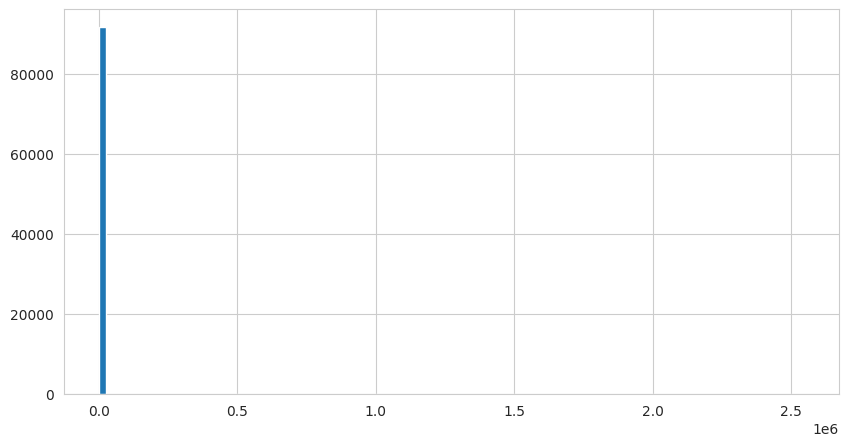

In [ ]:
#plot histogram for price_per_m2

data['price_per_m2'] = data['price']*1000/data['area']
data['price_per_m2'].hist(bins=100, figsize=(10,5))

In [ ]:
#handle outlier
data.drop(data[data['price_per_m2']>1500].index, inplace=True)
print(len(data))

93945


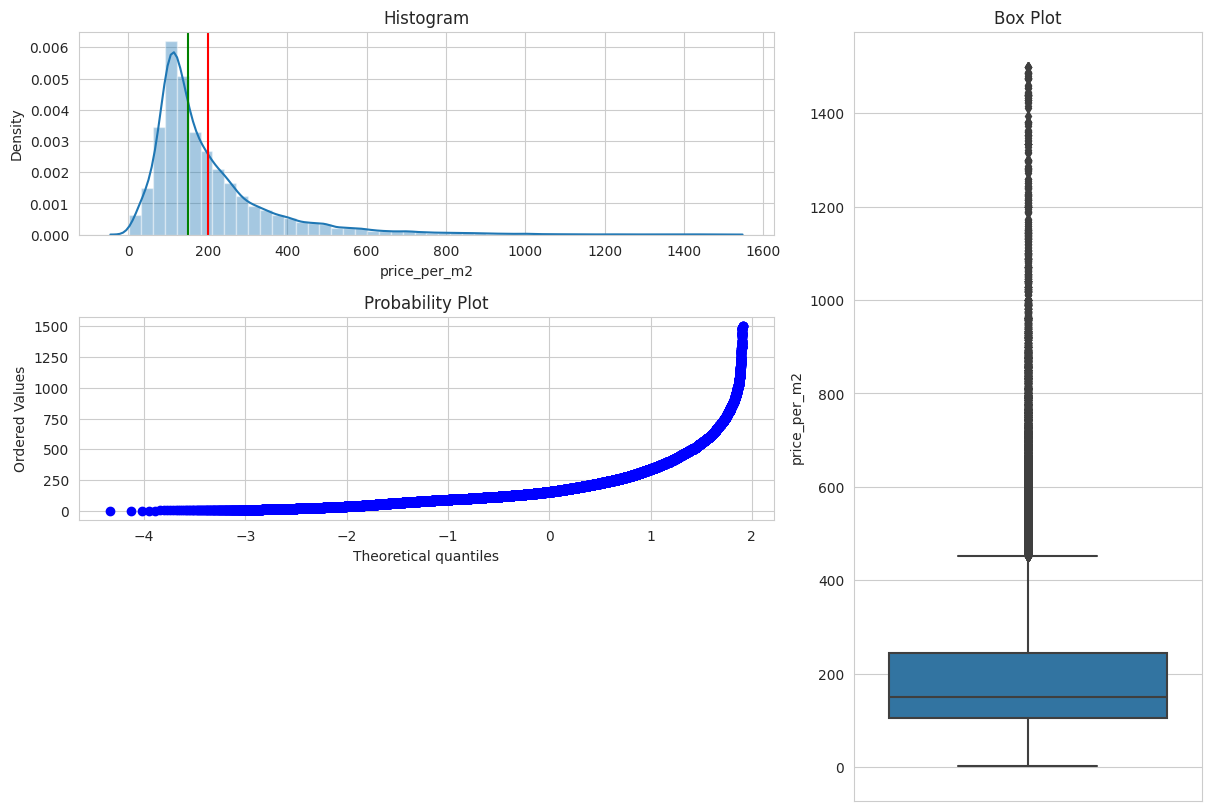

In [ ]:
def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')

    sns.distplot(df.loc[:, feature], norm_hist = True,ax = ax1)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')

    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title.
    ax3.set_title('Box Plot')
    sns.boxplot(y=df[feature], ax = ax3)

three_chart_plot(data, 'price_per_m2')

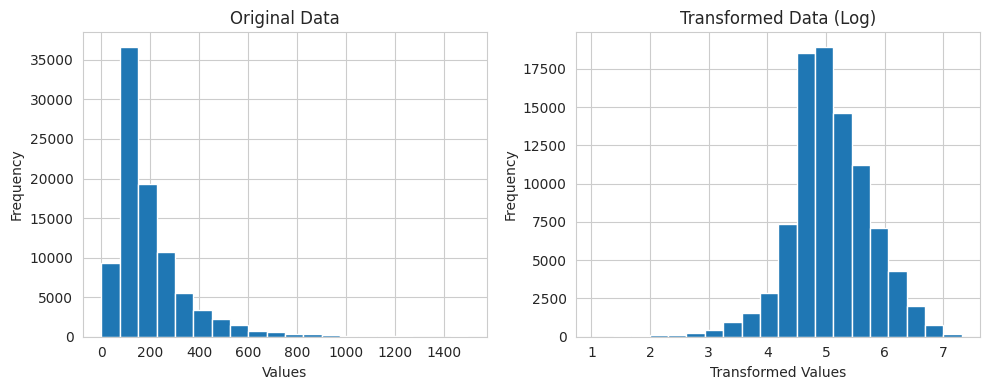

In [ ]:
# transformation
column_name = 'price_per_m2'

transformed_data = np.log(data[column_name] + 1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(data[column_name], bins=20)
plt.title('Original Data')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=20)
plt.title('Transformed Data (Log)')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

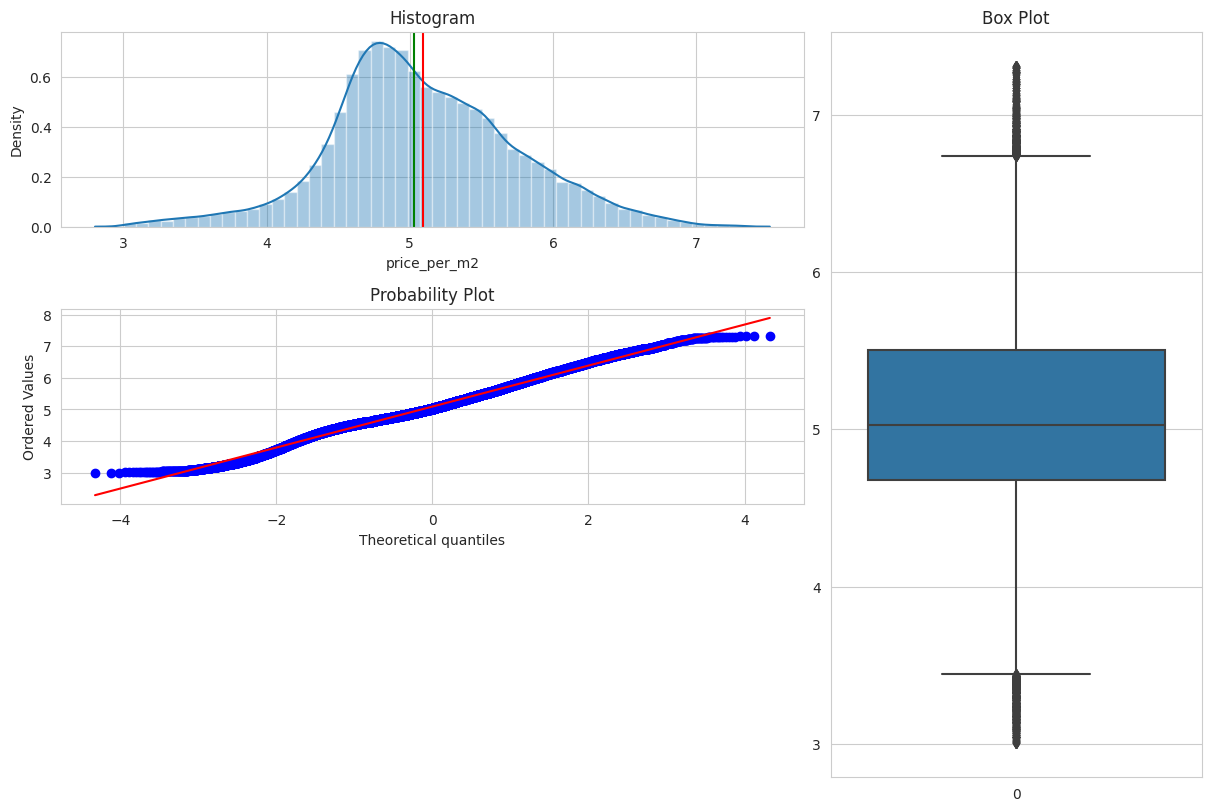

In [ ]:
def check_for_gaussian(df_col):
    fig = plt.figure(constrained_layout = True, figsize = (12, 8))
    grid = gridspec.GridSpec(ncols = 3, nrows = 3, figure = fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')

    sns.distplot(df_col, norm_hist = True,ax = ax1)
    plt.axvline(x = df_col.mean(), c = 'red')
    plt.axvline(x = df_col.median(), c = 'green')

    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df_col, plot = ax2)

    ## Customizing the Box Plot.
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title.
    ax3.set_title('Box Plot')
    sns.boxplot(df_col, ax = ax3)

log_price_per_m2 = np.log(data["price_per_m2"] + 1)
threshold = 3
check_for_gaussian(log_price_per_m2[log_price_per_m2 > threshold])

In [ ]:
from scipy.stats import skew
print("Skewness of price_per_m2 is", data['price_per_m2'].skew())
print("Skewness of log price_per_m2 (before) is", np.log(data['price_per_m2'] + 1).skew())
print("Skewness of log price_per_m2 (after) is", log_price_per_m2[log_price_per_m2 > threshold].skew())

Skewness of price_per_m2 is 2.440040247354665
Skewness of log price_per_m2 (before) is -0.1913608779102404
Skewness of log price_per_m2 (after) is 0.1282398148194875


In [ ]:
# number of datapoint if transform:

print(f"before: {len(log_price_per_m2)}")
print(f"after: {len(log_price_per_m2[log_price_per_m2 > threshold])}")

before: 93945
after: 90716


number of datapoint to be dropped is not significant compared to total datapoints, decide to drop

In [ ]:
data["log_price_per_m2"] = np.log(data["price_per_m2"] + 1)

mask = data["log_price_per_m2"] > threshold
filtered_data = data[mask]

In [ ]:
print(len(data))
print(len(filtered_data))

93945
90716


As the mean of the feature is greater than the median which is greater than the mode and the line is flat towards the right in the histogram, the given feature is Positively Skewed. Most of the houses were sold less than the average price.



In [ ]:
filtered_data.replace('Null', np.nan, inplace=True)
filtered_data.replace('NULL', np.nan, inplace=True)

In [ ]:
filtered_data.replace('True', True, inplace=True)
filtered_data.replace('False', False, inplace=True)

filtered_data.replace('true', True, inplace=True)
filtered_data.replace('false', False, inplace=True)

<Axes: >

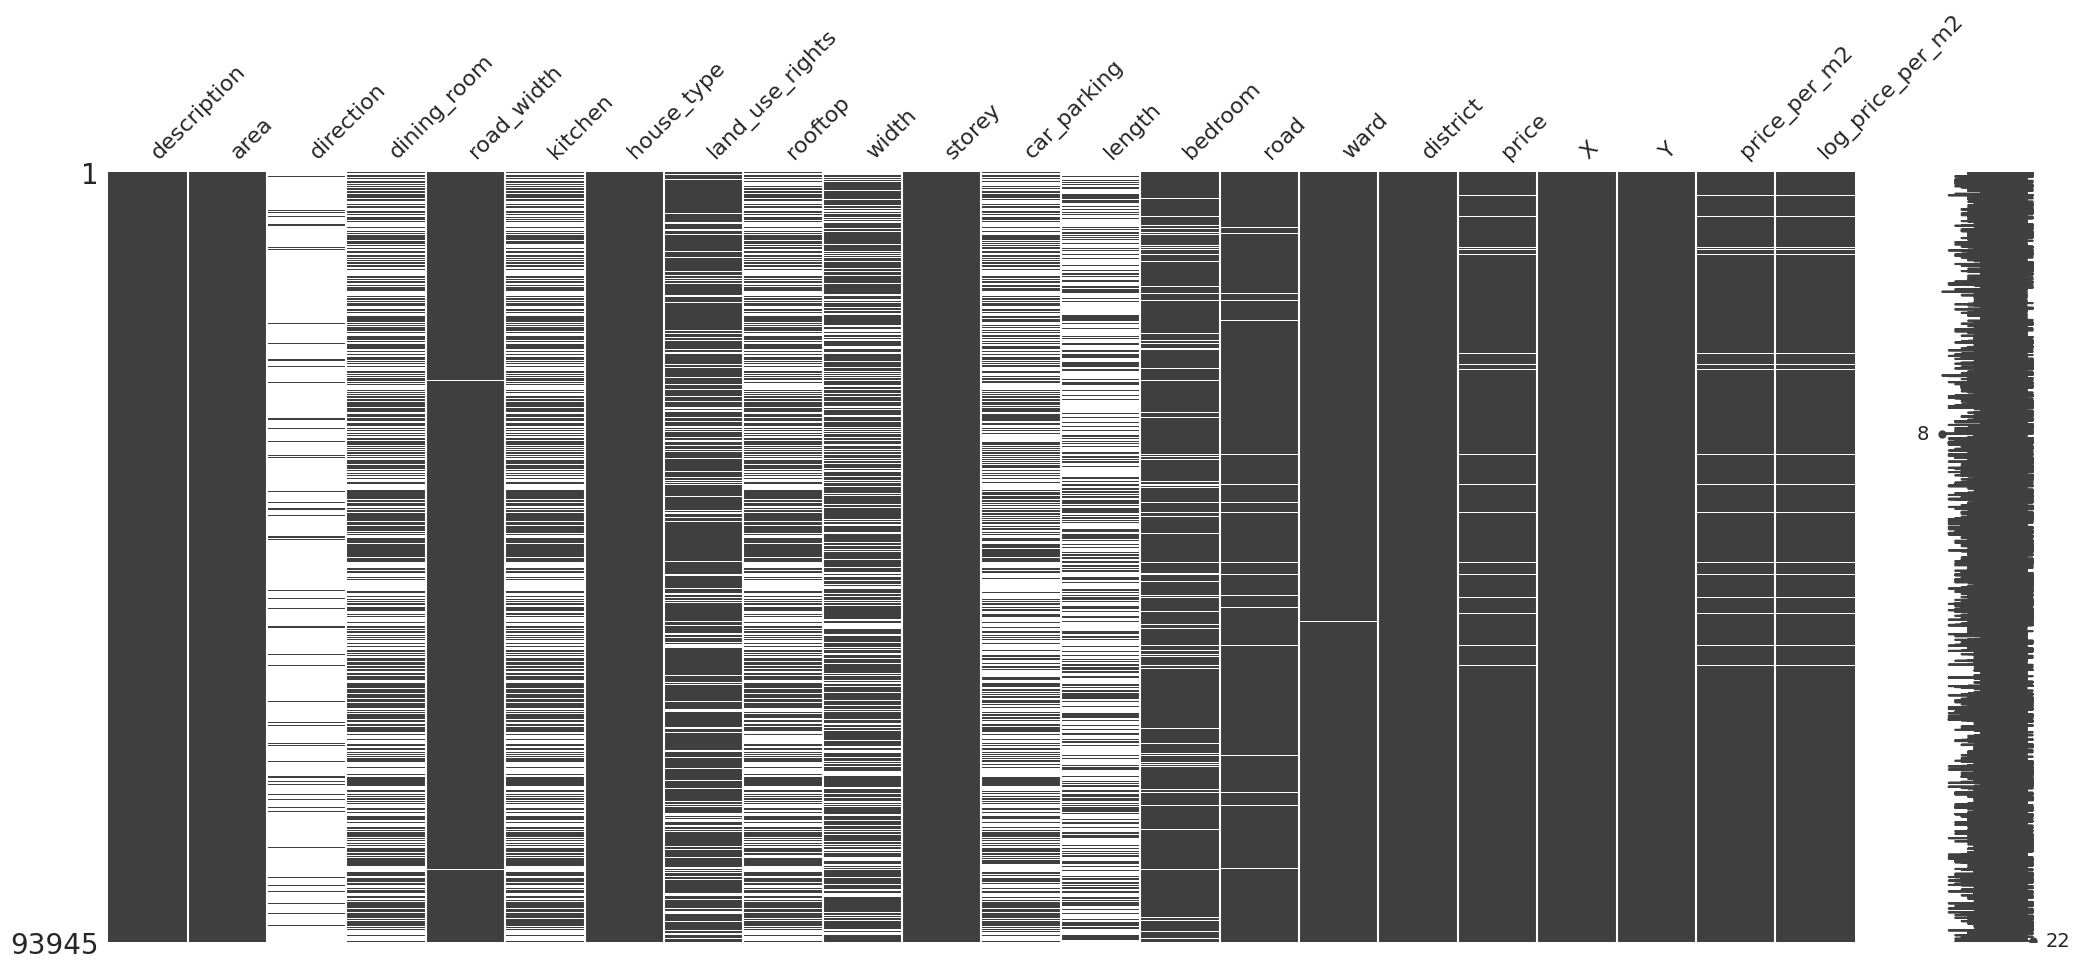

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(data)

Drop columns where price is null

In [ ]:
print(len(filtered_data[filtered_data['price'].isnull()]))

print(len(data[data['price'].isnull()]))

0
2644


In [ ]:
# data.drop(data[data['price'].isnull()].index, inplace=True)

In [ ]:
def null_table(data):
    """
    A function which returns the number and percentage of null values in the given dataset.
    """
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' : values, 'Approximate Percentage of Null Values' : percentages}
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame
null_frame_train = null_table(data)
null_frame_train.sort_values(by = 'Approximate Percentage of Null Values').tail(20)

,Columns,Count of Null Values,Approximate Percentage of Null Values
19,Y,0,0.000000
18,X,0,0.000000
16,district,0,0.000000
6,house_type,0,0.000000
0,description,302,0.321465
15,ward,390,0.415137
4,road_width,635,0.675927
20,price_per_m2,2644,2.814413
17,price,2644,2.814413
21,log_price_per_m2,2644,2.814413


In [ ]:
null_frame_train = null_table(filtered_data)
null_frame_train.sort_values(by = 'Approximate Percentage of Null Values').tail(20)

,Columns,Count of Null Values,Approximate Percentage of Null Values
18,X,0,0.000000
17,price,0,0.000000
16,district,0,0.000000
20,price_per_m2,0,0.000000
21,log_price_per_m2,0,0.000000
1,area,0,0.000000
6,house_type,0,0.000000
0,description,279,0.307553
15,ward,386,0.425504
4,road_width,567,0.625028


In [ ]:
data.reset_index(drop=True, inplace=True)
filtered_data.reset_index(drop=True, inplace=True)

In [ ]:
# drop direction

def drop_column(df, col_to_drop):
    df_copy = df.copy()
    df_copy.drop(col_to_drop, axis=1, inplace=True)
    return df_copy

filtered_data_1 = drop_column(filtered_data, "direction")

In [ ]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):

    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')

    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )

    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')

    return plt.show()

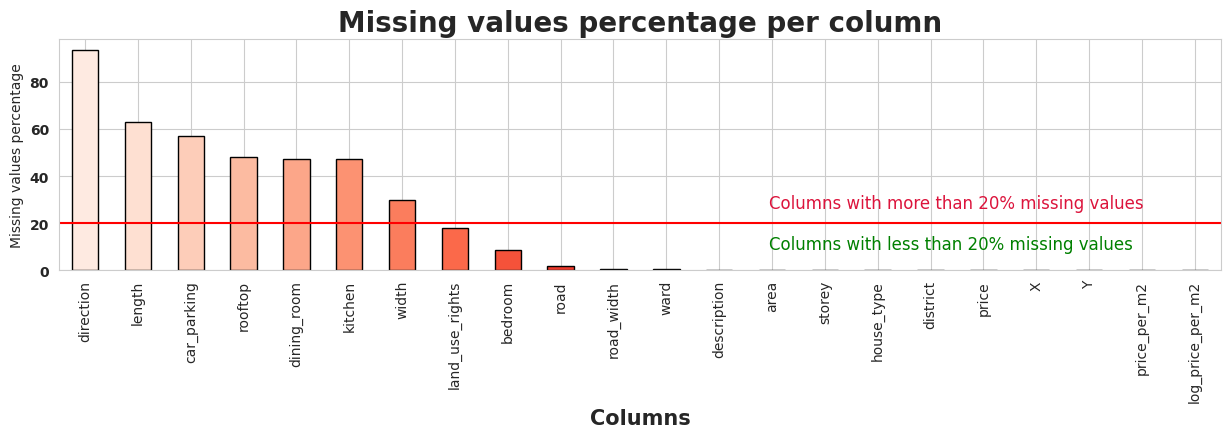

In [ ]:
msv_1(filtered_data, 20, color=sns.color_palette('Reds',15))

In [ ]:
def columns_above_threshold(data_frame, threshold):
    null_percentages = (data_frame.isnull().sum() / len(data_frame)) * 100
    above_threshold = null_percentages[null_percentages > threshold]
    return above_threshold.index.tolist()

We drop all row with missing values in at least three columns in list direction,length,car_parking,rooftop,dining_room,kitchen,width

In [ ]:
columns_to_check = columns_above_threshold(filtered_data, 20)
print(columns_to_check)

threshold = len(columns_to_check) - 5
df_cleaned = filtered_data.dropna(subset=columns_to_check, thresh=threshold)
print(len(df_cleaned))

['direction', 'dining_room', 'kitchen', 'rooftop', 'width', 'car_parking', 'length']
60873


In [ ]:
columns_to_check_1 = columns_above_threshold(filtered_data_1, 20)
print(columns_to_check_1)

threshold = len(columns_to_check_1) - 5
df_cleaned_1 = filtered_data_1.dropna(subset=columns_to_check_1, thresh=threshold)
len(df_cleaned_1)

['dining_room', 'kitchen', 'rooftop', 'width', 'car_parking', 'length']


73225

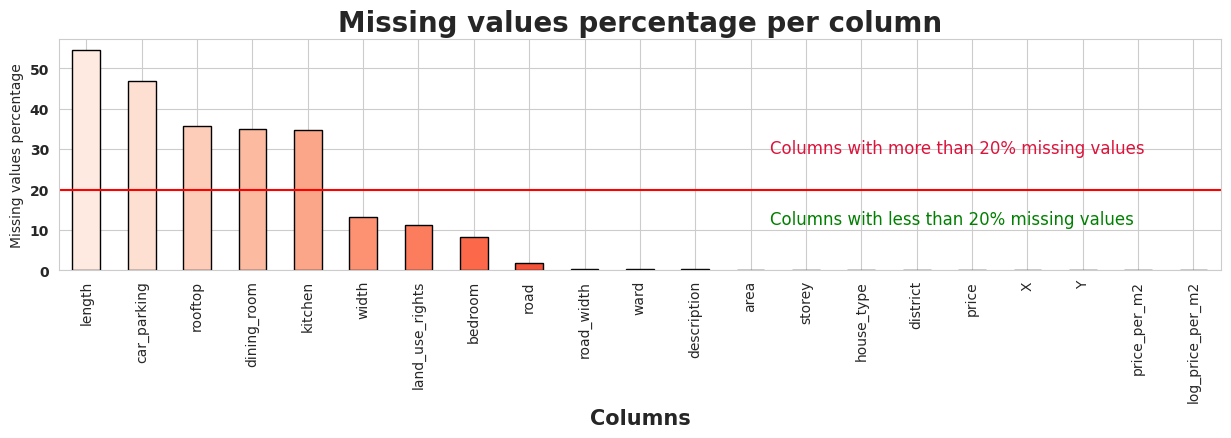

In [ ]:
msv_1(df_cleaned_1, 20, color=sns.color_palette('Reds',15))

In [ ]:
df_cleaned['storey'].replace('---', np.nan, inplace=True)
df_cleaned_1['storey'].replace('---', np.nan, inplace=True)

In [ ]:
df_cleaned['storey'] = df_cleaned['storey'].astype(float)
df_cleaned_1['storey'] = df_cleaned_1['storey'].astype(float)

In [ ]:
def fill_length(df):
    df['length'].fillna(df['area']/df['width'], inplace=True)
    return df
def fill_width(df):
    df['width'].fillna(df['area']/df['length'], inplace=True)
    return df

df_cleaned = fill_length(df_cleaned)
df_cleaned = fill_width(df_cleaned)


df_cleaned_1 = fill_length(df_cleaned_1)
df_cleaned_1 = fill_width(df_cleaned_1)

In [ ]:
category_var = df_cleaned_1.select_dtypes(include = 'object')
num_var = df_cleaned_1.select_dtypes(exclude = 'object')

print("Number of categorical features are: ", category_var.shape[1])
print("Number of numerical features are: ", num_var.shape[1])

Number of categorical features are:  10
Number of numerical features are:  11


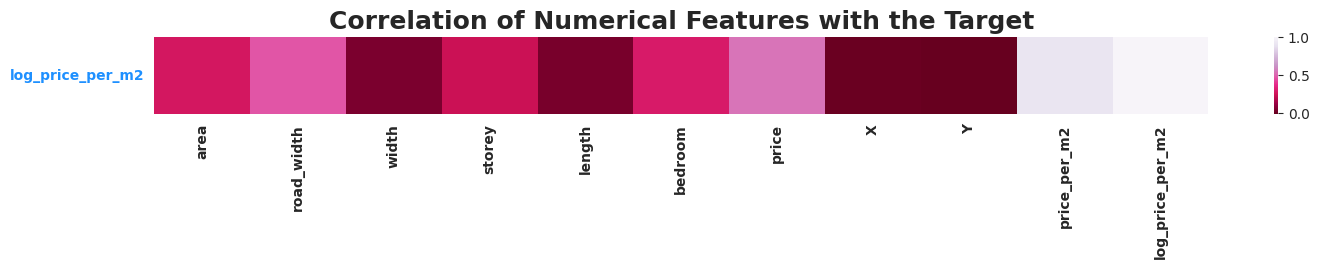

In [ ]:
num = num_var
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))

sns.heatmap(corr_num.sort_values(by = ['log_price_per_m2'], ascending = False).head(1), cmap='PuRd_r')

plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()

In [ ]:
correlation = df_cleaned_1.corr()['log_price_per_m2'].sort_values(ascending = False).to_frame().head(10)

cmap = sns.light_palette("cyan", as_cmap = True)

s = correlation.style.background_gradient(cmap = cmap)

s

,log_price_per_m2
log_price_per_m2,1.000000
price_per_m2,0.898714
price,0.537674
road_width,0.465235
bedroom,0.290510
area,0.270699
storey,0.241059
width,0.049456
length,0.041543
X,0.003193


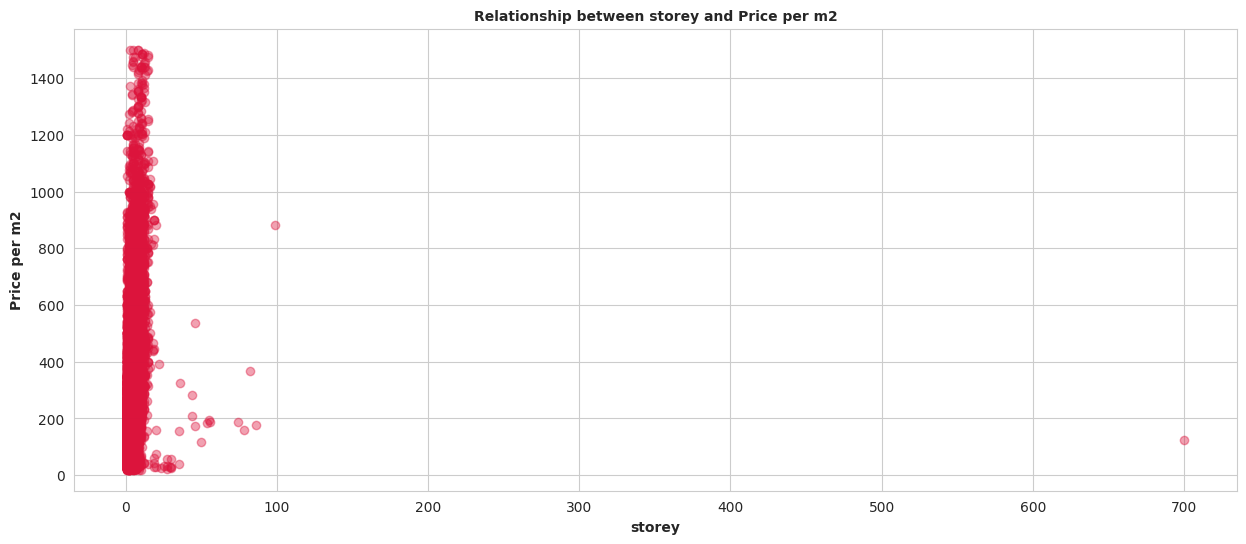

In [ ]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'storey', y = 'price_per_m2', data = df_cleaned_1, color='crimson', alpha=0.4)
plt.title('Relationship between storey and Price per m2', weight = 'bold', fontsize = 10)
plt.xlabel('storey', weight = 'bold')
plt.ylabel('Price per m2', weight = 'bold')
plt.show()

In [ ]:
# drop outlier

unique_values = df_cleaned_1['storey'].unique()
count_unique = df_cleaned_1['storey'].nunique()

print("Unique values in 'storey' column:", unique_values)
print("Number of unique values in 'storey' column:", count_unique)

Unique values in 'storey' column: [  6.   4.   9.   5.   3.   2.   1.   7.  nan   8.  12.  10.  11.  14.
  25.  15.  13.  29.  35.  22.  19.  30.  46.  18.  86.  20.  27.  50.
  16.  82.  17.  44.  56. 700.  36.  99.  74.  23.  54.  78.  55.]
Number of unique values in 'storey' column: 40


In [ ]:
mask = df_cleaned_1['storey'] < 28
df_cleaned_2 = df_cleaned_1[mask]

In [ ]:
df_cleaned_2['storey'].unique()

array([ 6.,  4.,  9.,  5.,  3.,  2.,  1.,  7.,  8., 12., 10., 11., 14.,
       25., 15., 13., 22., 19., 18., 20., 27., 16., 17., 23.])

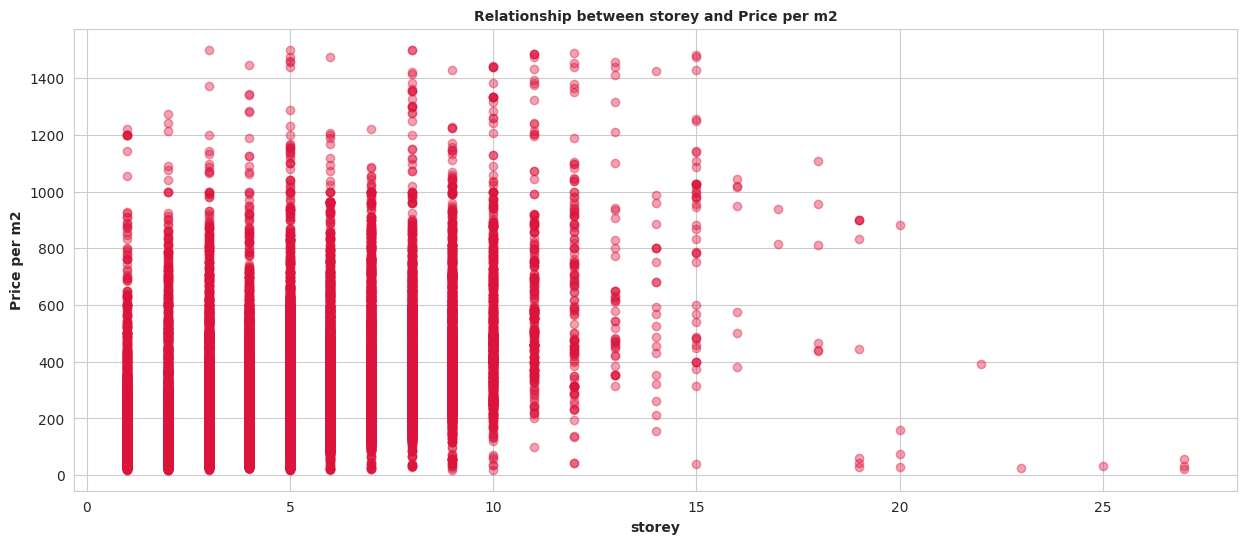

In [ ]:
plt.figure(figsize = ((15, 6)))
plt.scatter(x = 'storey', y = 'price_per_m2', data = df_cleaned_2, color='crimson', alpha=0.4)
plt.title('Relationship between storey and Price per m2', weight = 'bold', fontsize = 10)
plt.xlabel('storey', weight = 'bold')
plt.ylabel('Price per m2', weight = 'bold')
plt.show()

In [ ]:
print(len(df_cleaned_2))
print(len(df_cleaned_1))

67653
73225


<Axes: xlabel='road_width', ylabel='log_price_per_m2'>

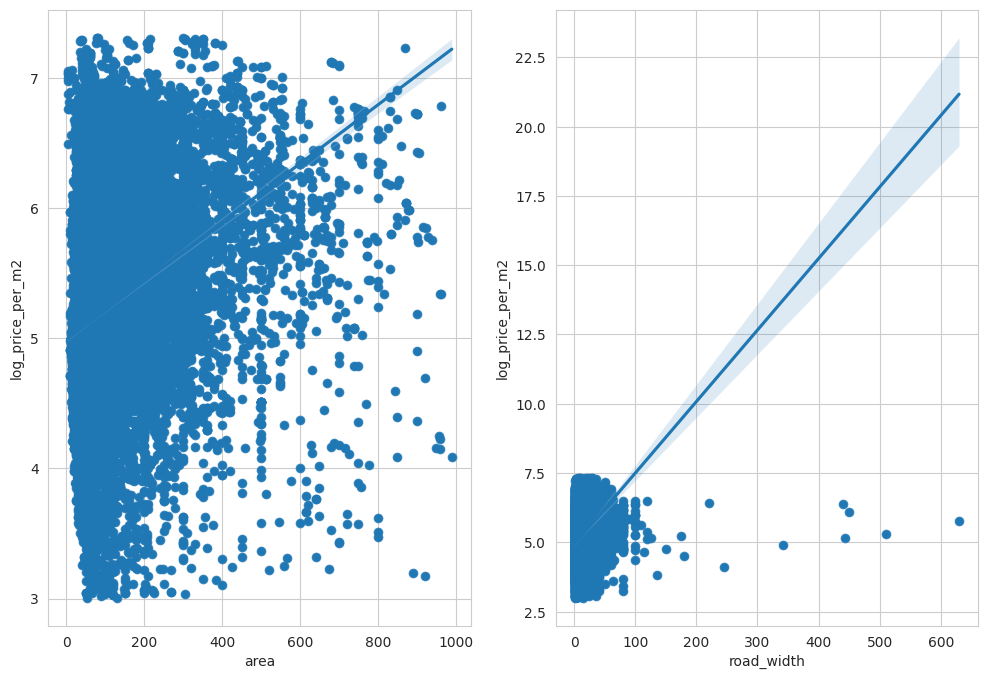

In [ ]:
## Scatter plotting for SalePrice and GrLivArea.
fig, (ax1, ax2) = plt.subplots(figsize = (12, 8), ncols = 2,sharey = False)

sns.scatterplot(x = df_cleaned_2['area'], y = df_cleaned_2['log_price_per_m2'],  ax = ax1)
## Putting a regression line.
sns.regplot(x = df_cleaned_2['area'], y = df_cleaned_2['log_price_per_m2'], ax = ax1)

sns.scatterplot(x = df_cleaned_2['road_width'],y = df_cleaned_2['log_price_per_m2'], ax = ax2)
## regression line for MasVnrArea and SalePrice.
sns.regplot(x = df_cleaned_2['road_width'], y = df_cleaned_2['log_price_per_m2'], ax=ax2)

In [ ]:
mask = df_cleaned_2['road_width'] < 105
df_cleaned_3 = df_cleaned_2[mask]

<Axes: xlabel='road_width', ylabel='log_price_per_m2'>

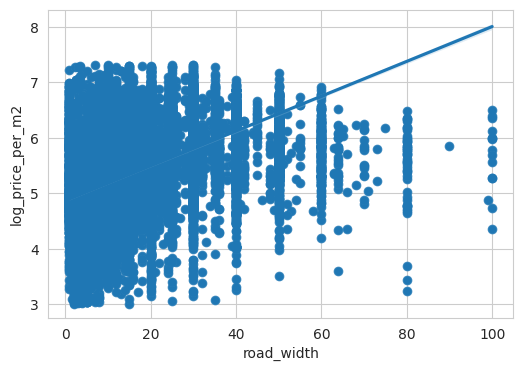

In [ ]:
fig, ax = plt.subplots(figsize = (6, 4), ncols = 1,sharey = False)
sns.scatterplot(x = df_cleaned_3['road_width'],y = df_cleaned_3['log_price_per_m2'], ax = ax)
sns.regplot(x = df_cleaned_3['road_width'], y = df_cleaned_3['log_price_per_m2'], ax=ax)

In [ ]:
correlation = df_cleaned_3['log_price_per_m2'].corr(df_cleaned_3['road_width'])
print(f"Correlation between 'log_price_per_m2' and 'road_width': {correlation}")

Correlation between 'log_price_per_m2' and 'road_width': 0.5303476084147194


In [ ]:
correlation = df_cleaned_3['log_price_per_m2'].corr(df_cleaned_3['area'])
print(f"Correlation between 'log_price_per_m2' and 'area': {correlation}")

Correlation between 'log_price_per_m2' and 'area': 0.30801772692964996


<Axes: xlabel='storey', ylabel='log_price_per_m2'>

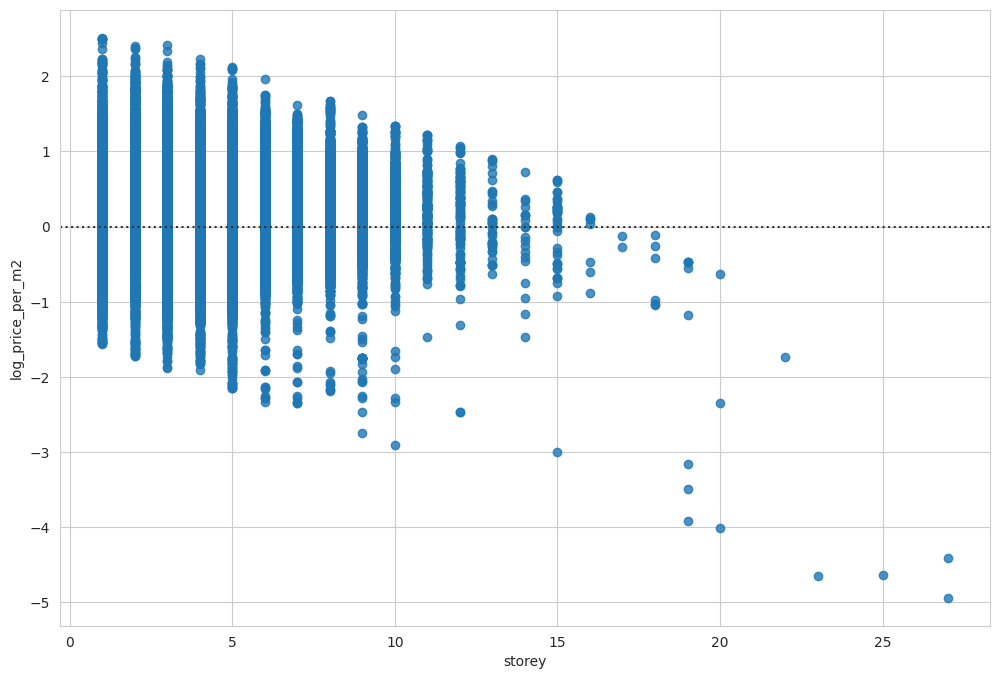

In [ ]:
plt.subplots(figsize = (12,8))
sns.residplot(x = df_cleaned_3['storey'], y = df_cleaned_3['log_price_per_m2'])

In [ ]:
correlation = df_cleaned_3['log_price_per_m2'].corr(df_cleaned_3['storey'])
print(f"Correlation between 'log_price_per_m2' and 'storey': {correlation}")

Correlation between 'log_price_per_m2' and 'storey': 0.44685004931265854


Giá chung cư rẻ hơn giá nhà đất (storey tỉ lệ nghịch với price/m2) (downtrend between storey and price/m2)

In [ ]:
len(df_cleaned_3)

67364

In [ ]:
category_var.columns

Index(['description', 'dining_room', 'kitchen', 'house_type',
       'land_use_rights', 'rooftop', 'car_parking', 'road', 'ward',
       'district'],
      dtype='object')

<Figure size 1500x1000 with 0 Axes>

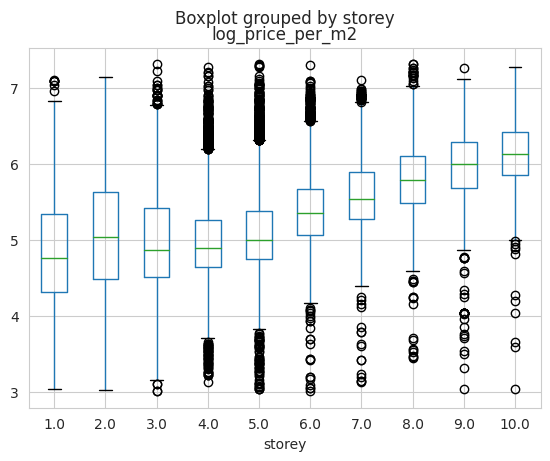

In [ ]:
plt.figure(figsize = ((15, 10)))
#plot house price boxplot for storey from 1 to 10, with storey > 10 is 10
df_cleaned_3[df_cleaned_3['storey']<=10].boxplot(by = 'storey', column = 'log_price_per_m2' )

plt.show()

ValueError: ignored

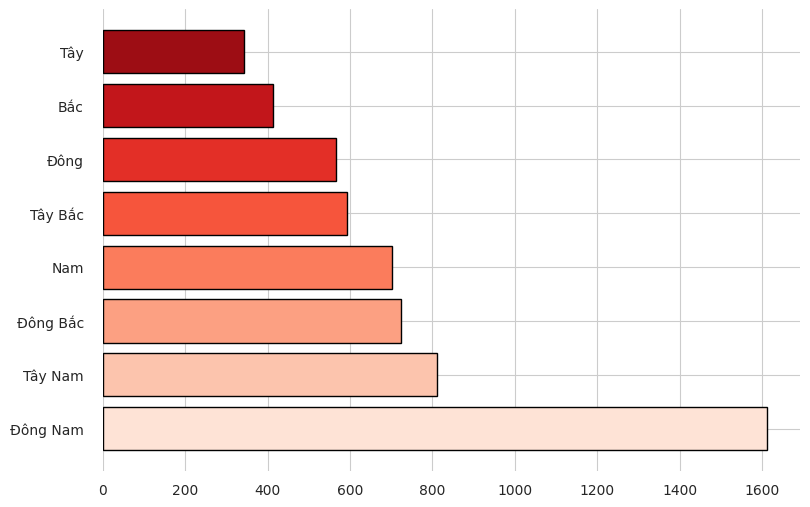

In [ ]:
def horizontal_plot(data, column_name, color, plot_title, log=False):

    """
    A function that plots a horizontal bar graph for the given column name
    """

    fig, ax = plt.subplots(figsize = (9, 6))

    title_cnt = data[column_name].value_counts().sort_values(ascending = False).reset_index()
    if log == True:
        title_cnt.iloc[:, 1] = np.log(title_cnt.iloc[:, 1])
    mn = ax.barh(title_cnt.iloc[:, 0], title_cnt.iloc[:, 1], edgecolor = 'black', color =
                sns.color_palette(color, len(title_cnt)))

    for s in ['top','bottom','left','right']:
        ax.spines[s].set_visible(False)

    # Remove x,y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad=5)
    ax.yaxis.set_tick_params(pad=10)

    # Add x,y gridlines
    ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.2)

    # Show top values
    ax.invert_yaxis()

    ax.set_title(plot_title,weight='bold',loc='center', pad=10, fontsize=16)

    ax.set_xlabel('Count', weight='bold')

    for i in ax.patches:
        ax.text(i.get_width() + 1.0, i.get_y() + 0.5, str(round((i.get_width()), 2)),
                fontsize=10, fontweight='bold', color='grey')

    plt.yticks(weight='bold')
    plt.xticks(weight='bold')

    plt.show()
horizontal_plot(df_cleaned, 'direction', 'Reds', 'Most frequent directions')

ValueError: ignored

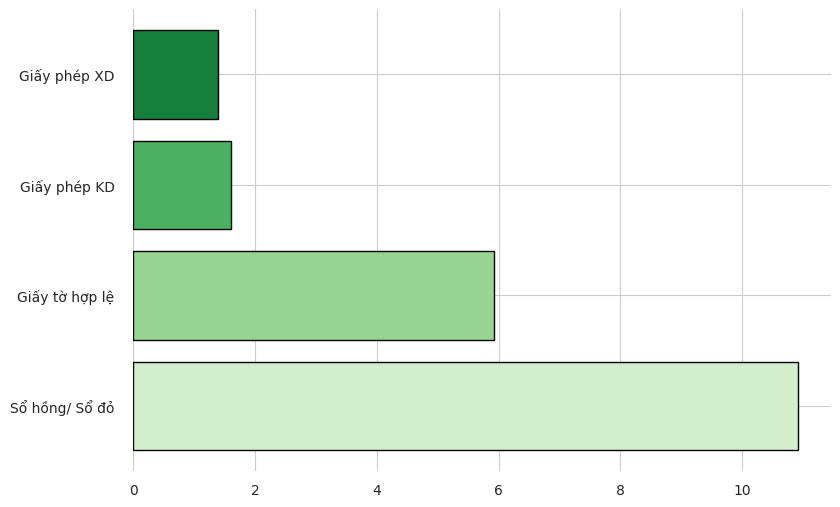

In [ ]:
horizontal_plot(df_cleaned, 'land_use_rights', 'Greens', 'Most frequent land legal', log = True)

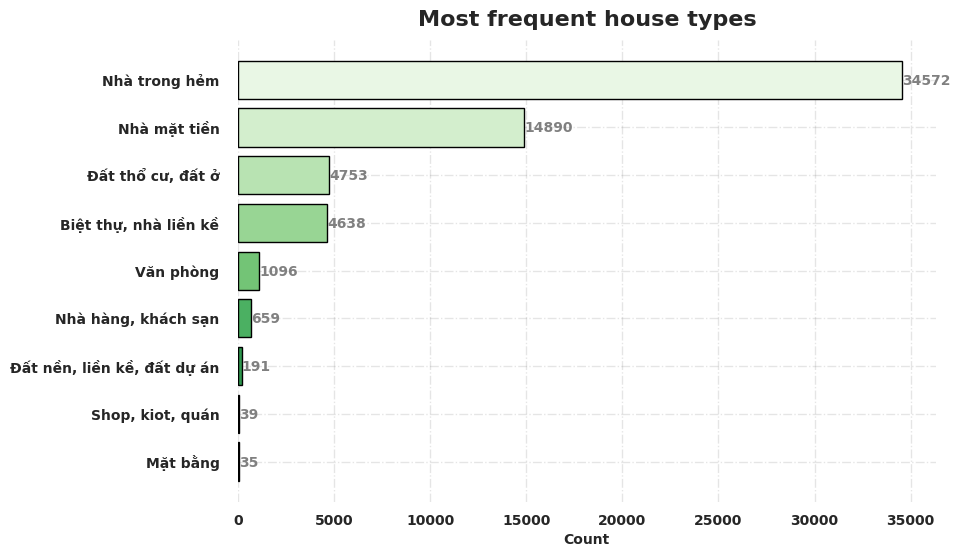

In [ ]:
horizontal_plot(df_cleaned, 'house_type', 'Greens', 'Most frequent house types', log = False)

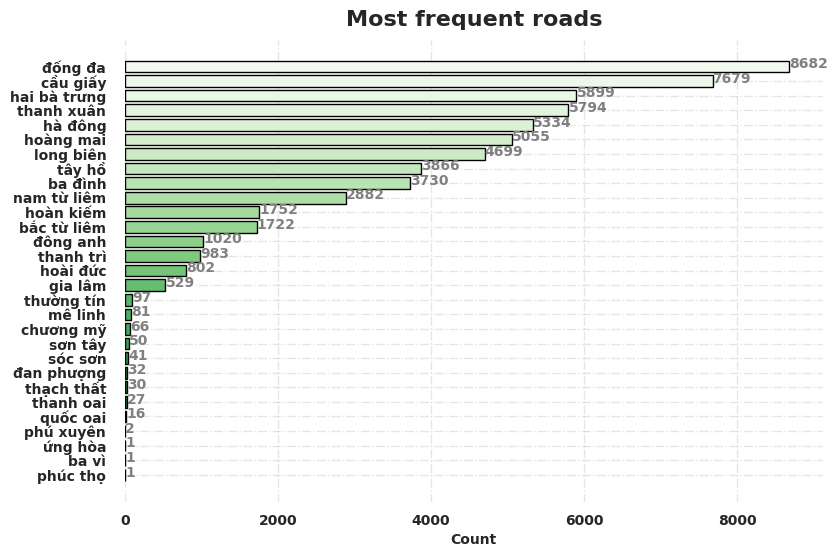

In [ ]:
horizontal_plot(df_cleaned, 'district', 'Greens', 'Most frequent roads', log = False)

In [ ]:
df_cleaned['district'].value_counts().sort_values(ascending = False)

đống đa         8682
cầu giấy        7679
hai bà trưng    5899
thanh xuân      5794
hà đông         5334
hoàng mai       5055
long biên       4699
tây hồ          3866
ba đình         3730
nam từ liêm     2882
hoàn kiếm       1752
bắc từ liêm     1722
đông anh        1020
thanh trì        983
hoài đức         802
gia lâm          529
thường tín        97
mê linh           81
chương mỹ         66
sơn tây           50
sóc sơn           41
đan phượng        32
thạch thất        30
thanh oai         27
quốc oai          16
phú xuyên          2
ứng hòa            1
ba vì              1
phúc thọ           1
Name: district, dtype: int64

In [ ]:
from geopy.geocoders import Nominatim
import time
from tqdm import tqdm

In [ ]:
def get_loc(x, lat=True):
    x = str(x)
    x_clean = x.replace(","," ")
    try:
        x_clean.replace("None", "")
        loc = Nominatim(user_agent="GetLoc")
        getLoc = loc.geocode(x_clean)
        return (  getLoc.latitude, getLoc.longitude)
    except:
        try:
            x = ','.join(x.split(',')[1:])
            x_clean = x.replace(","," ")
            x_clean.replace("None", "")
            loc = Nominatim(user_agent="GetLoc")
            getLoc = loc.geocode(x_clean)
            return (  getLoc.latitude, getLoc.longitude)
        except:
            try:
                x = ','.join(x.split(',')[1:])
                x_clean = x.replace(","," ")
                x_clean.replace("None", "")
                loc = Nominatim(user_agent="GetLoc")
                getLoc = loc.geocode(x_clean)
                return (  getLoc.latitude, getLoc.longitude)
            except:
                loc = Nominatim(user_agent="GetLoc")
                getLoc = loc.geocode("Hà Nội")
                return (  getLoc.latitude, getLoc.longitude)


In [ ]:
df_cleaned_3.columns

Index(['description', 'area', 'dining_room', 'road_width', 'kitchen',
       'house_type', 'land_use_rights', 'rooftop', 'width', 'storey',
       'car_parking', 'length', 'bedroom', 'road', 'ward', 'district', 'price',
       'X', 'Y', 'price_per_m2', 'log_price_per_m2'],
      dtype='object')

In [ ]:
import pickle
import os

<Axes: >

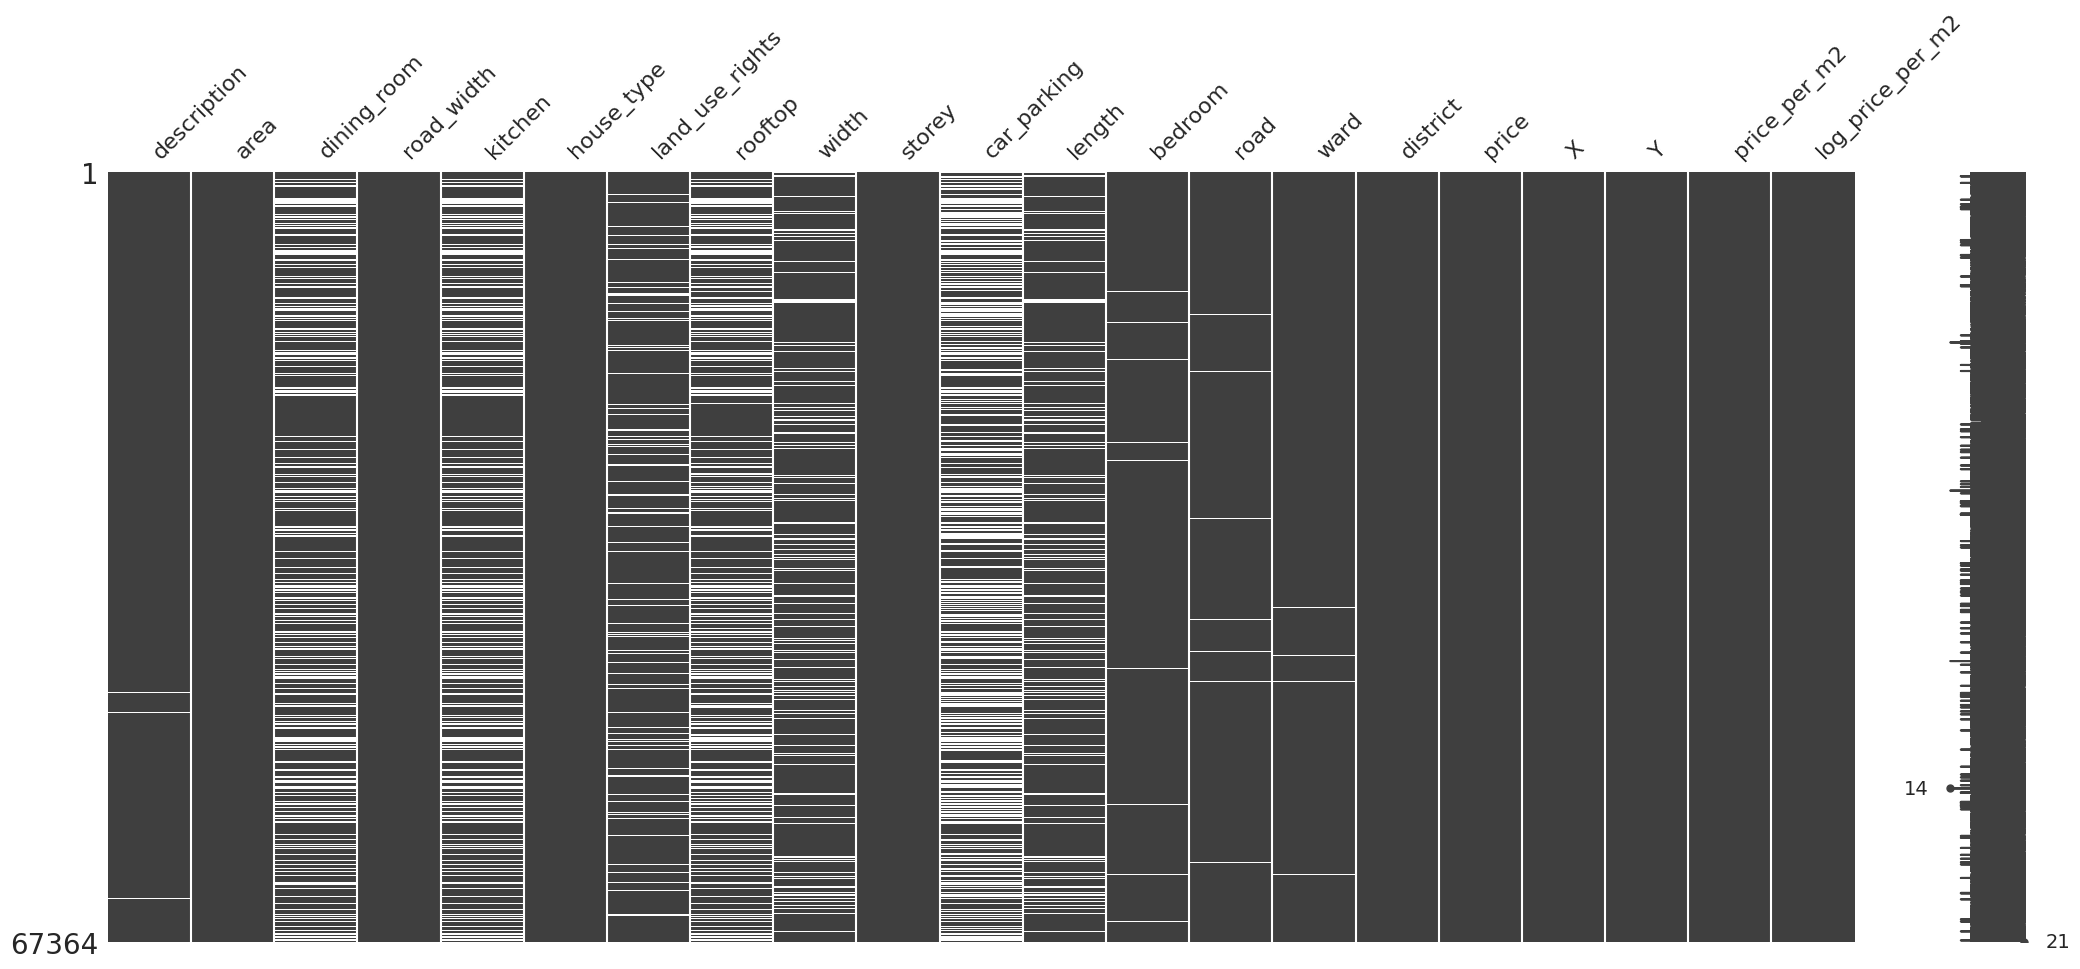

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(df_cleaned_3)

In [ ]:
df_cleaned_3['house_type']= df_cleaned_3['house_type'].astype(str)
df_cleaned_3['land_use_rights']= df_cleaned_3['land_use_rights'].astype(str)

In [ ]:
category_var = df_cleaned_3.select_dtypes(include = 'object')
num_var = df_cleaned_3.select_dtypes(exclude = 'object')

In [ ]:
has_inf = np.isinf(num_var).any().any()

if has_inf:
    print("DataFrame contains infinite values.")
else:
    print("DataFrame does not contain infinite values.")

DataFrame does not contain infinite values.


In [ ]:
def null_table(data):
    """
    A function which returns the number and percentage of null values in the given dataset.
    """
    indices = data.isnull().sum().index
    values = data.isnull().sum().values
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)
    d = {'Columns' : indices, 'Count of Null Values' : values, 'Approximate Percentage of Null Values' : percentages}
    # data = dict(zip(indices, percentages))
    null_frame = pd.DataFrame(data = d)
    return null_frame
null_frame_train = null_table(df_cleaned_3[num_var.columns])
null_frame_train.sort_values(by = 'Approximate Percentage of Null Values').tail(20)

,Columns,Count of Null Values,Approximate Percentage of Null Values
0,area,0,0.000000
1,road_width,0,0.000000
3,storey,0,0.000000
6,price,0,0.000000
7,X,0,0.000000
8,Y,0,0.000000
9,price_per_m2,0,0.000000
10,log_price_per_m2,0,0.000000
5,bedroom,499,0.740752
2,width,9122,13.541357


Number of nan value in continuous columns is relatively small, filled by median

In [ ]:
# Handle missing value in continuous datatype columns

selected_columns = num_var.columns
selected_columns_1 = [i for i in selected_columns if i not in ['width', 'length']]

non_null_df_cleaned = df_cleaned_3.copy()

for column in selected_columns_1:
    median_value = non_null_df_cleaned[column].median()
    non_null_df_cleaned[column].fillna(median_value, inplace=True)

non_null_df_cleaned['length'].fillna(non_null_df_cleaned['area'].apply(lambda x: math.sqrt(x)), inplace=True)
non_null_df_cleaned['width'].fillna(non_null_df_cleaned['area'].apply(lambda x: math.sqrt(x)), inplace=True)

<Axes: >

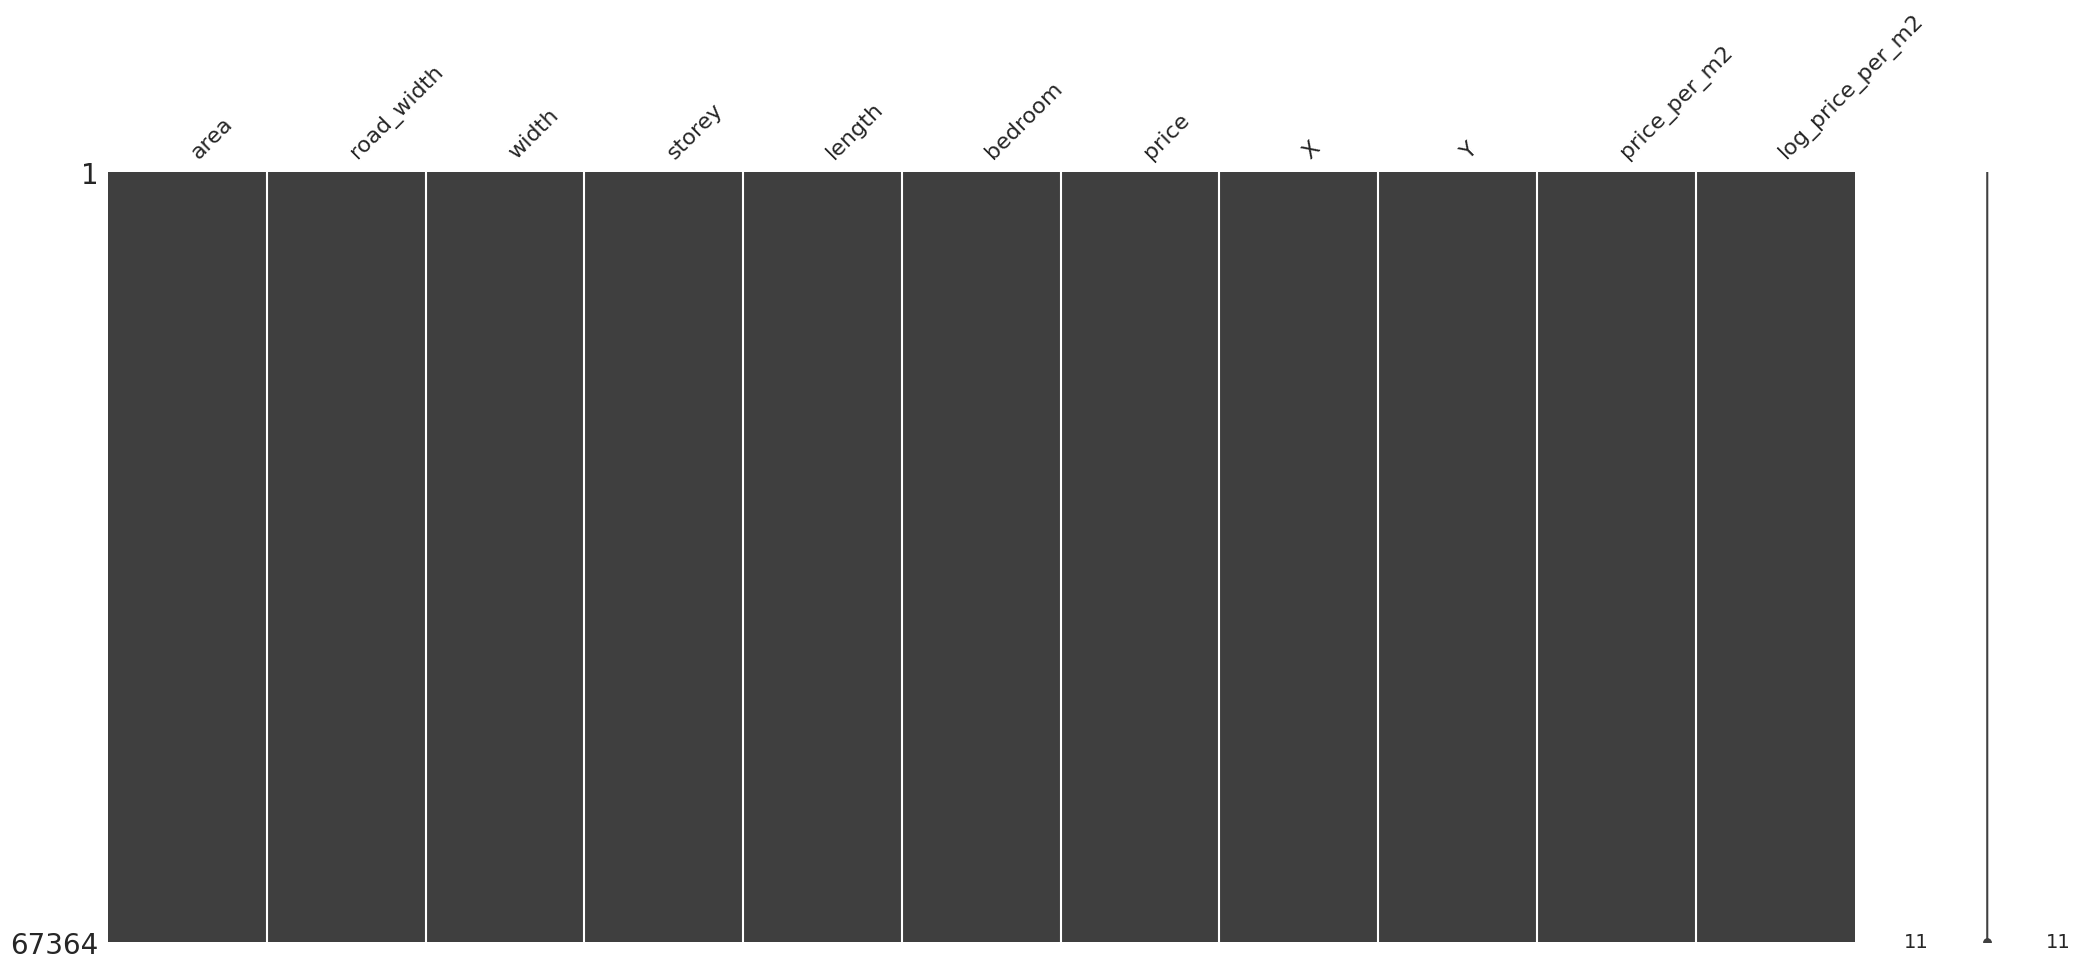

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(non_null_df_cleaned[num_var.columns])

# non null

In [ ]:
columns_to_drop = ['price', 'price_per_m2']
columns_exist = any(col in non_null_df_cleaned.columns for col in columns_to_drop)
if columns_exist:
    non_null_df_cleaned.drop(columns=columns_to_drop, inplace=True)

Correlation between 'log_price_per_m2' and 'bedroom': 0.2876343633886533


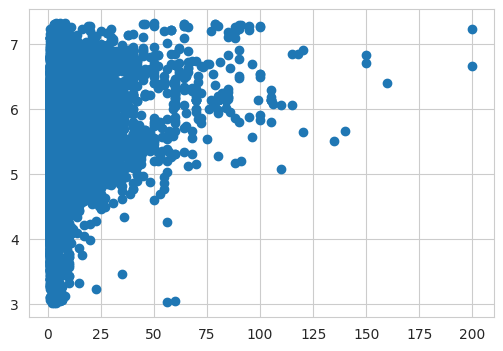

In [ ]:
plt.subplots(figsize = (6,4))
plt.scatter(non_null_df_cleaned['bedroom'], non_null_df_cleaned['log_price_per_m2'])

correlation = non_null_df_cleaned['log_price_per_m2'].corr(non_null_df_cleaned['bedroom'])
print(f"Correlation between 'log_price_per_m2' and 'bedroom': {correlation}")

67335
Correlation between 'log_price_per_m2' and 'bedroom': 0.2971082672695178


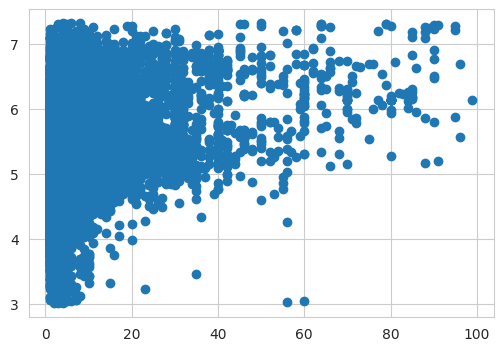

In [ ]:
mask = non_null_df_cleaned['bedroom'] < 100
non_null_df_cleaned_1 = non_null_df_cleaned[mask]

print(len(non_null_df_cleaned_1))

plt.subplots(figsize = (6,4))
plt.scatter(non_null_df_cleaned_1['bedroom'], non_null_df_cleaned_1['log_price_per_m2'])

correlation = non_null_df_cleaned_1['log_price_per_m2'].corr(non_null_df_cleaned_1['bedroom'])
print(f"Correlation between 'log_price_per_m2' and 'bedroom': {correlation}")

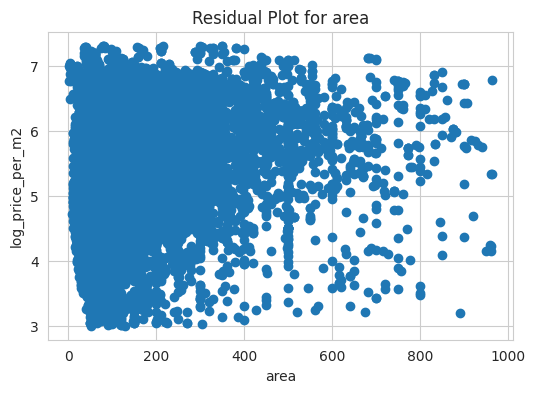

Correlation between 'log_price_per_m2' and area: 0.3060163759235971


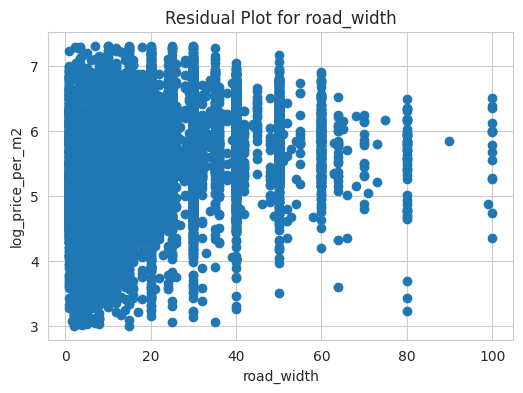

Correlation between 'log_price_per_m2' and road_width: 0.5301024285526961


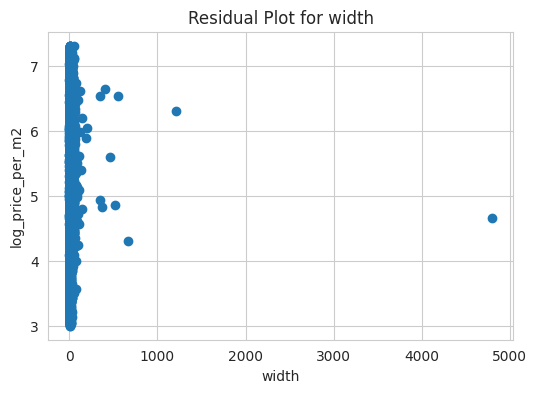

Correlation between 'log_price_per_m2' and width: 0.046417066121673796


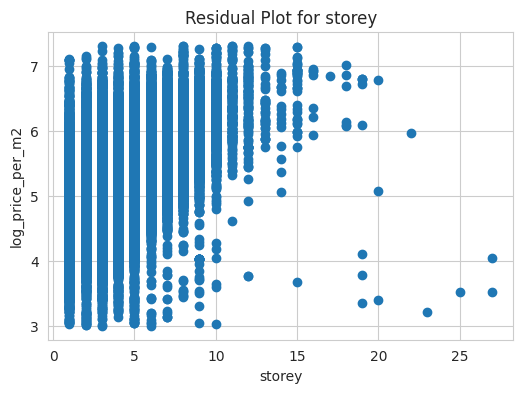

Correlation between 'log_price_per_m2' and storey: 0.44545128097639947


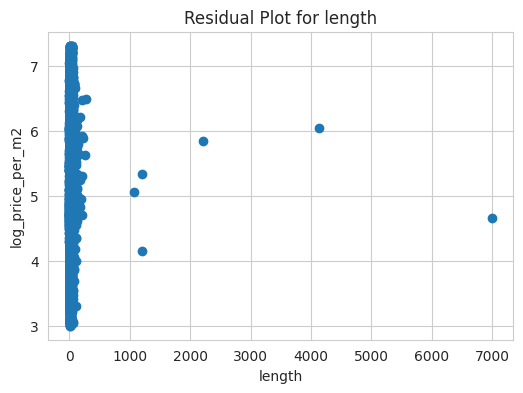

Correlation between 'log_price_per_m2' and length: 0.05428176833304803


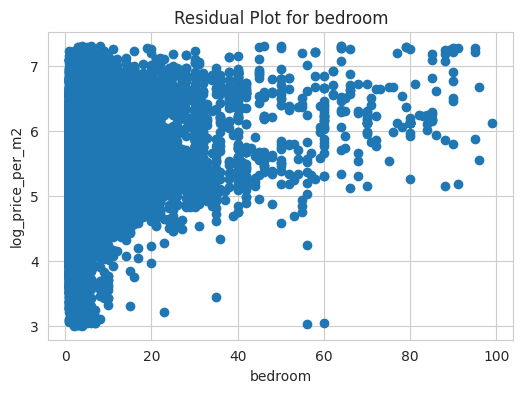

Correlation between 'log_price_per_m2' and bedroom: 0.2971082672695178


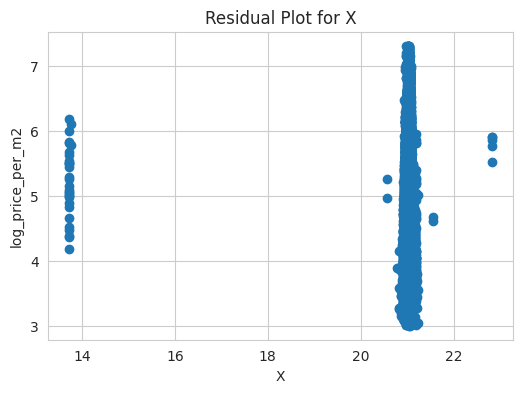

Correlation between 'log_price_per_m2' and X: 0.024104528693656226


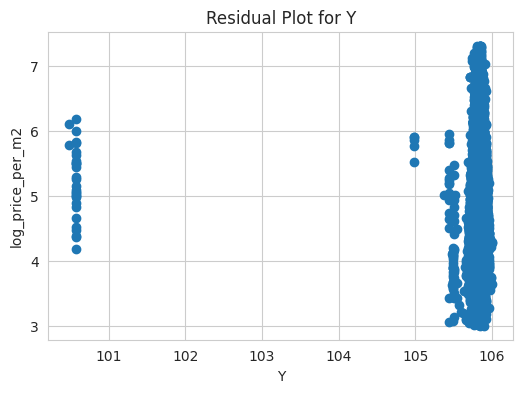

Correlation between 'log_price_per_m2' and Y: 0.004914295715057921


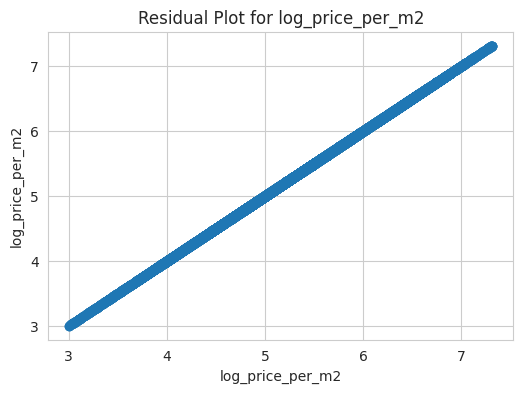

Correlation between 'log_price_per_m2' and log_price_per_m2: 0.9999999999999998


In [ ]:
for col_name in non_null_df_cleaned_1.select_dtypes(exclude='object').columns:
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.scatter(non_null_df_cleaned_1[col_name], non_null_df_cleaned_1['log_price_per_m2'])
    correlation = non_null_df_cleaned_1['log_price_per_m2'].corr(non_null_df_cleaned_1[col_name])
    ax.set_title(f"Residual Plot for {col_name}")
    ax.set_xlabel(col_name)
    ax.set_ylabel('log_price_per_m2')
    plt.show()
    print(f"Correlation between 'log_price_per_m2' and {col_name}: {correlation}")

width, length still contain outlier

In [ ]:
# handle outlier for width attribute
mask = non_null_df_cleaned_1['width'] < 200
non_null_df_cleaned_2 = non_null_df_cleaned_1[mask]

print(len(non_null_df_cleaned_2))

67324


In [ ]:
# handle outlier for width attribute
mask = non_null_df_cleaned_2['length'] < 1000
non_null_df_cleaned_3 = non_null_df_cleaned_2[mask]

print(len(non_null_df_cleaned_3))

67319


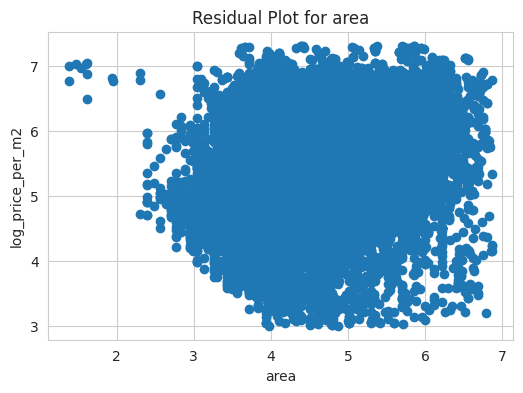

Correlation between 'log_price_per_m2' and area: 0.30597124282029897


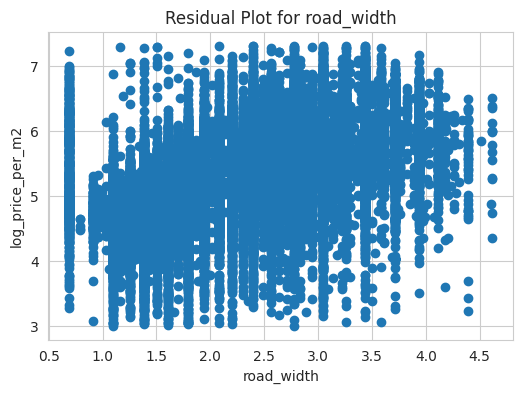

Correlation between 'log_price_per_m2' and road_width: 0.5300442825653219


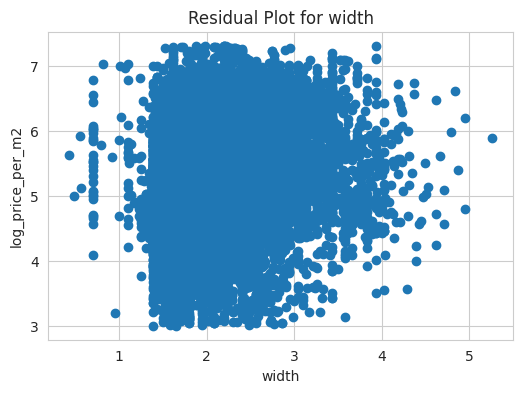

Correlation between 'log_price_per_m2' and width: 0.1986098718804834


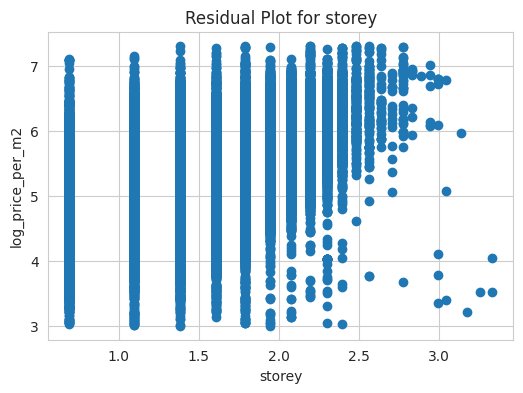

Correlation between 'log_price_per_m2' and storey: 0.44552924795595517


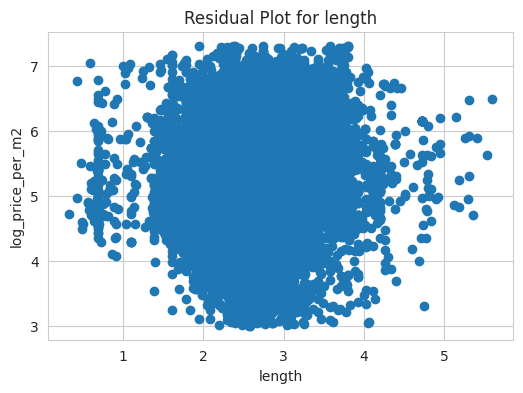

Correlation between 'log_price_per_m2' and length: 0.24170424972276214


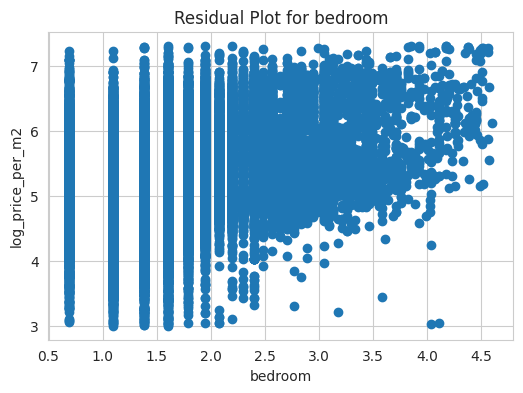

Correlation between 'log_price_per_m2' and bedroom: 0.29711457773582267


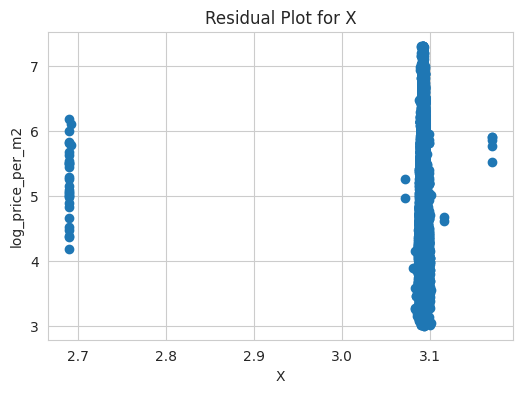

Correlation between 'log_price_per_m2' and X: 0.024077288514094103


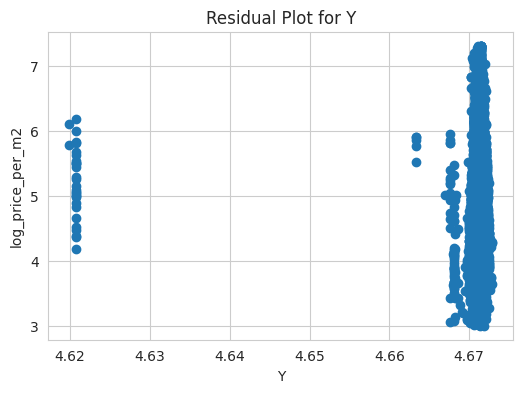

Correlation between 'log_price_per_m2' and Y: 0.004953539385724219


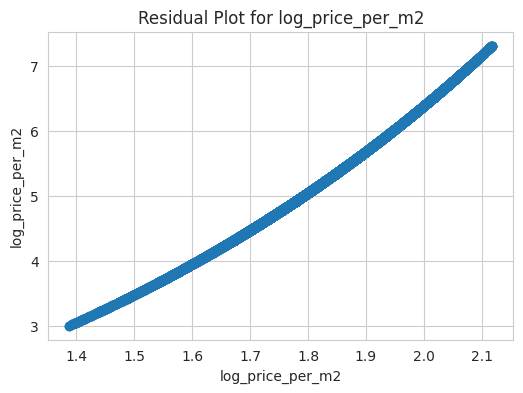

Correlation between 'log_price_per_m2' and log_price_per_m2: 1.0


In [ ]:
for col_name in non_null_df_cleaned_3.select_dtypes(exclude='object').columns:
    fig, ax = plt.subplots(figsize=(6, 4))
    plt.scatter(np.log(non_null_df_cleaned_3[col_name] + 1), non_null_df_cleaned_3['log_price_per_m2'])
    correlation = non_null_df_cleaned_3['log_price_per_m2'].corr(non_null_df_cleaned_3[col_name])
    ax.set_title(f"Residual Plot for {col_name}")
    ax.set_xlabel(col_name)
    ax.set_ylabel('log_price_per_m2')
    plt.show()
    print(f"Correlation between 'log_price_per_m2' and {col_name}: {correlation}")

In [ ]:
integer_columns_float_type = []
for col in non_null_df_cleaned_3.columns:
    if non_null_df_cleaned_3[col].dtype == 'float64' and (non_null_df_cleaned_3[col] % 1 == 0).all():
        integer_columns_float_type.append(col)

# Display columns where all values are numerically integers but are stored as floats
print("Columns where values are numerically integers but stored as floats:")
print(integer_columns_float_type)

Columns where values are numerically integers but stored as floats:
['storey', 'bedroom']


In [ ]:
df_copy = non_null_df_cleaned_3.select_dtypes(exclude='object').copy()

for column_name in non_null_df_cleaned_3.select_dtypes(exclude='object'):
    noise = np.random.normal(loc=0, scale=1, size=len(df_copy))
    df_copy[column_name] = df_copy[column_name] + noise * 0.1

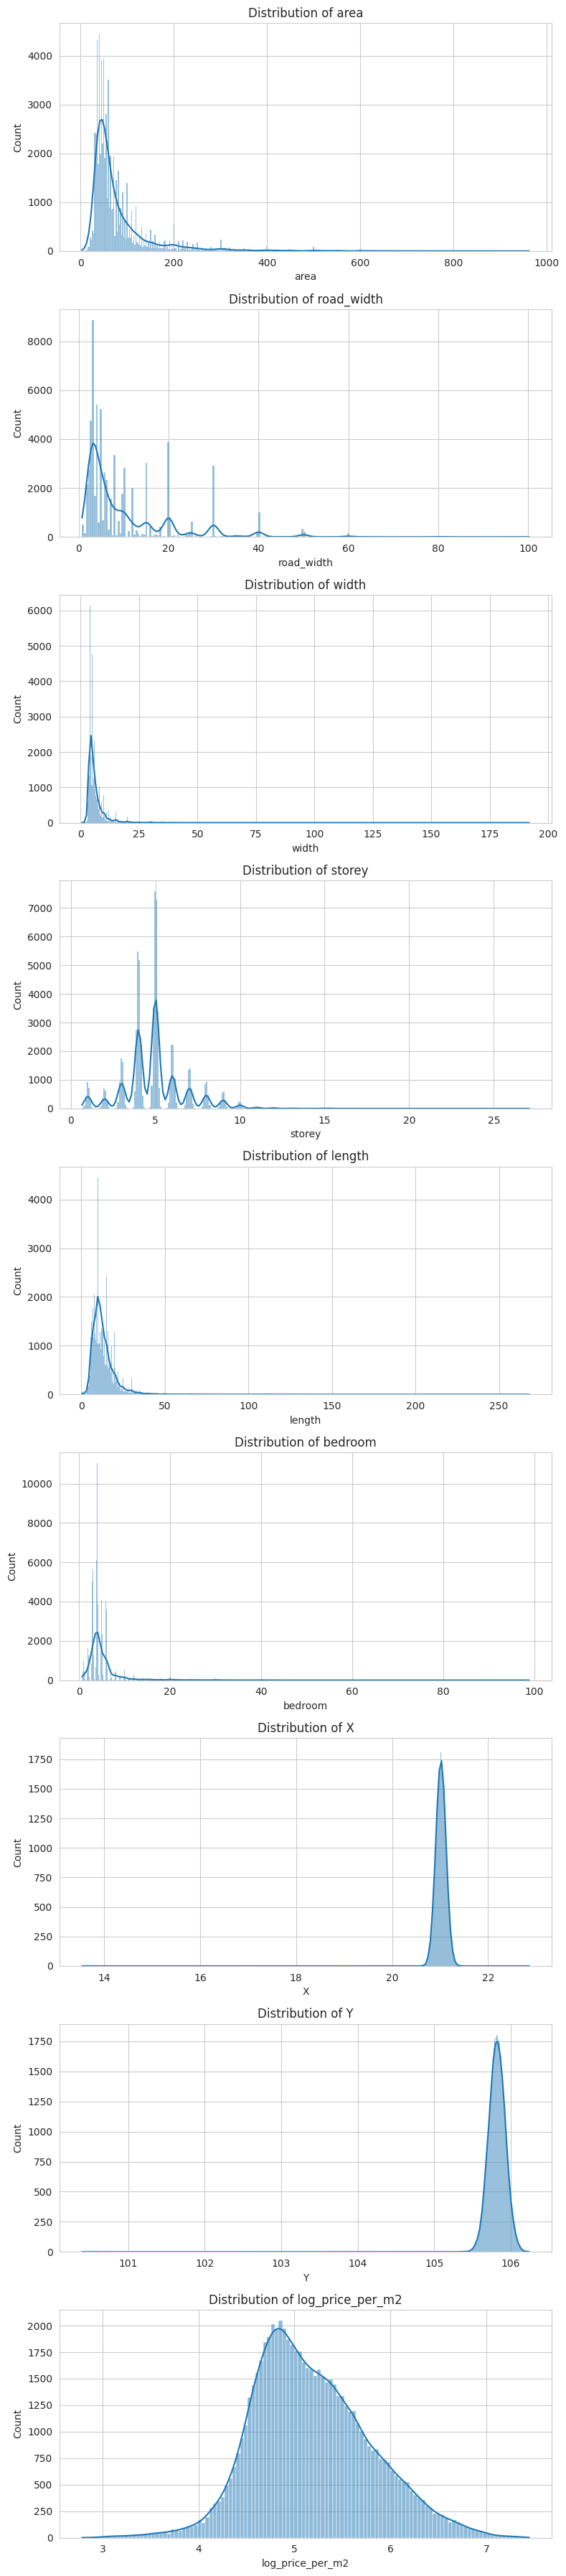

In [ ]:
def plot_hist(df):
    columns_to_visualize = df.columns.tolist()
    num_cols = len(columns_to_visualize)
    fig, axes = plt.subplots(num_cols, 1, figsize=(8, 4 * num_cols), sharex=False)
    for i, col in enumerate(columns_to_visualize):
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

plot_hist(df_copy)

In [ ]:
import math
# distance in km
def haversine(lat1, lon1, lat2, lon2):

    # distance between latitudes
    # and longitudes
    dLat = (lat2 - lat1) * math.pi / 180.0
    dLon = (lon2 - lon1) * math.pi / 180.0

    # convert to radians
    lat1 = (lat1) * math.pi / 180.0
    lat2 = (lat2) * math.pi / 180.0

    # apply formulae
    a = (pow(math.sin(dLat / 2), 2) +
         pow(math.sin(dLon / 2), 2) *
             math.cos(lat1) * math.cos(lat2));
    rad = 6371
    c = 2 * math.asin(math.sqrt(a))
    return rad * c

In [ ]:
#location of Ho Tay and Ho Guom
ht_lat = 21.058333
ht_long = 105.750000
hg_lat = 21.028333
hg_long = 105.853889

In [ ]:
df_copy['distance_to_Ho_Tay'] = df_copy[['X', 'Y']].apply(lambda row: haversine(row['X'], row['Y'], ht_lat, ht_long), axis=1)
df_copy['distance_to_Ho_Guom'] = df_copy[['X', 'Y']].apply(lambda row: haversine(row['X'], row['Y'], hg_lat, hg_long), axis=1)

In [ ]:
df_copy.head()

,area,road_width,width,storey,length,bedroom,X,Y,log_price_per_m2,distance_to_Ho_Tay,distance_to_Ho_Guom
19,53.928892,6.116632,4.818321,6.079167,11.258883,4.033982,20.994731,105.801804,5.568623,8.884053,6.571972
20,89.888040,7.051398,4.981379,3.940078,18.064034,3.918892,20.988896,105.794867,5.270980,9.016726,7.534392
21,32.999068,3.063503,5.074358,4.145322,6.546636,3.098018,21.008724,105.702790,4.456189,7.378116,15.834349
22,70.007481,3.021781,8.985636,3.891109,9.803316,3.869209,21.226222,105.780788,5.313499,18.939513,23.273945
23,59.763591,6.013035,4.513299,5.902811,13.370126,3.977193,20.873069,105.796667,5.369119,21.162645,18.258560


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# dataset = non_null_df_cleaned_3[non_null_df_cleaned_3.select_dtypes(exclude = 'object').columns]
dataset = df_copy
X = dataset.drop(columns=['log_price_per_m2'])
y = dataset['log_price_per_m2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.46696546933849686


In [ ]:
num_var = non_null_df_cleaned_3[non_null_df_cleaned_3.select_dtypes(exclude = 'object').columns]
cat_var = non_null_df_cleaned_3[non_null_df_cleaned_3.select_dtypes(include = 'object').columns]

<Axes: >

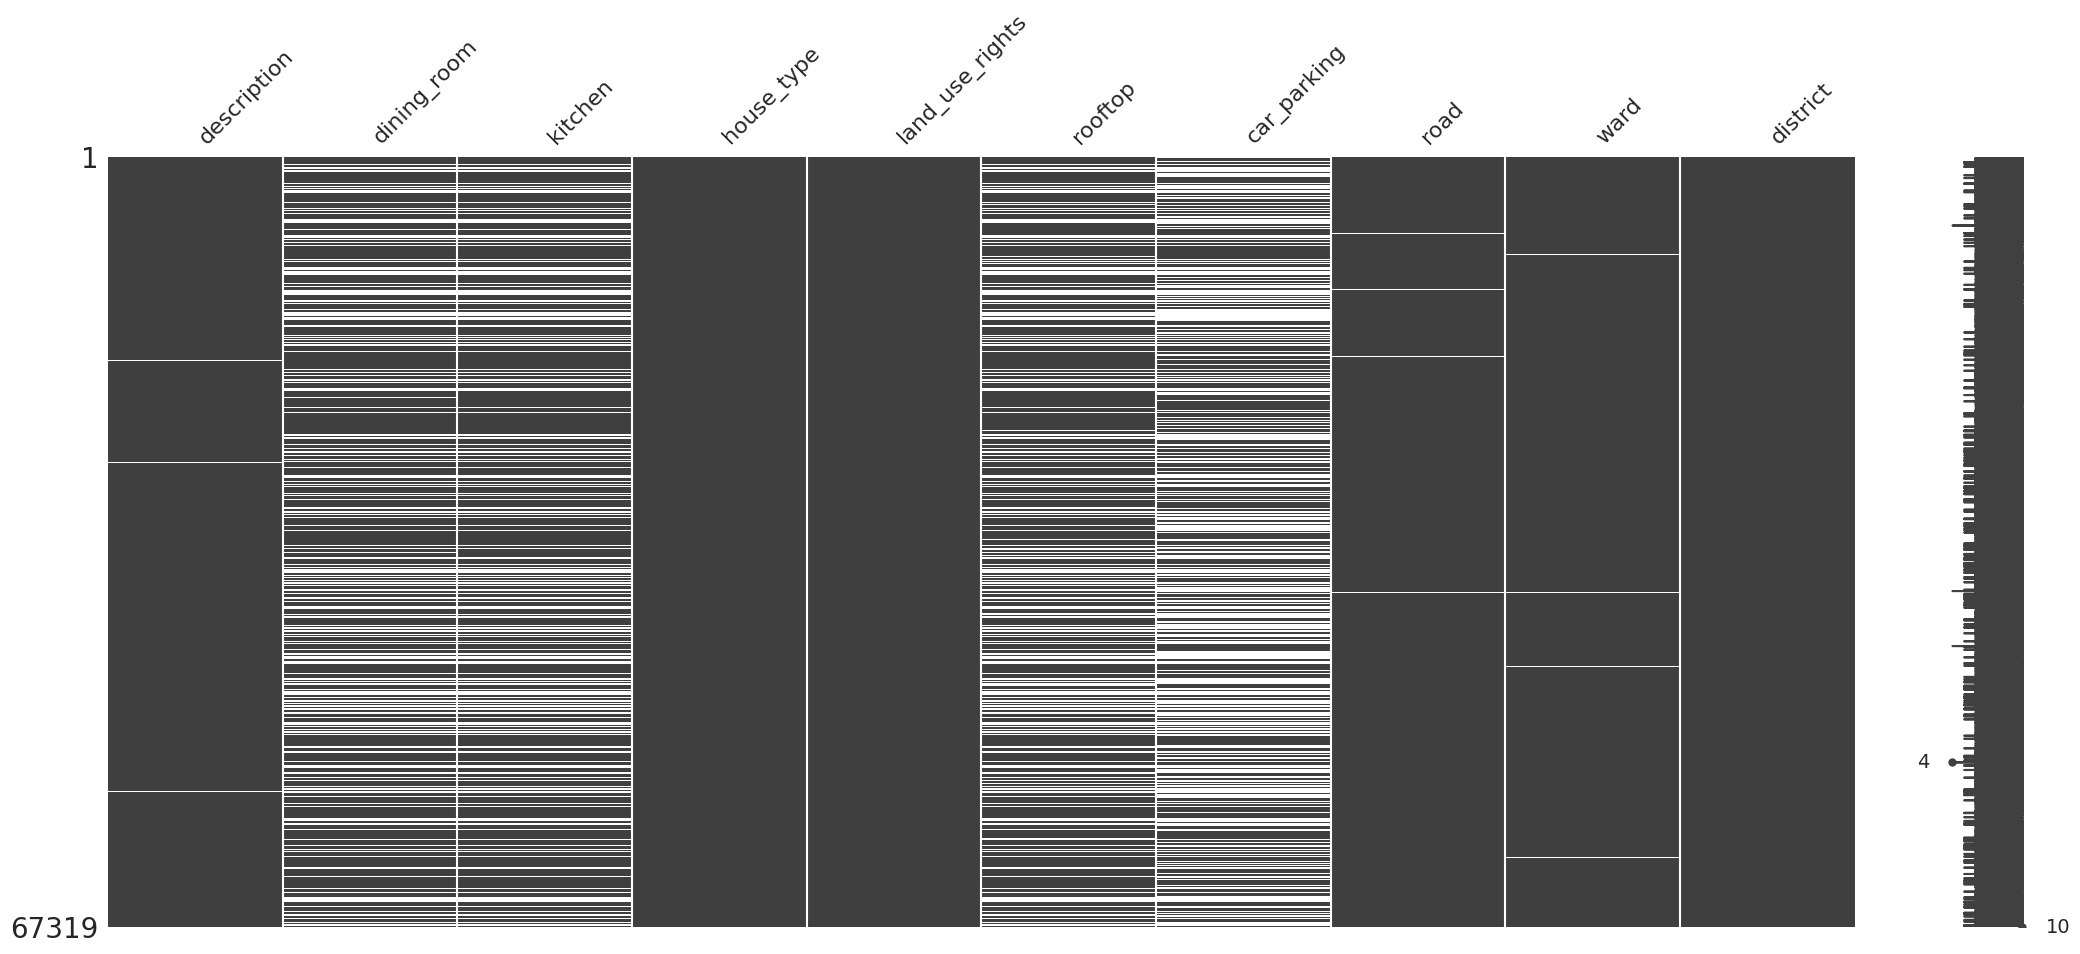

In [ ]:
import missingno as msno
%matplotlib inline
msno.matrix(cat_var)

In [ ]:
for column in cat_var.columns:
    unique_values = non_null_df_cleaned_3[column].unique()
    if set(unique_values) == {'True', 'False'} or set(unique_values) == {'true', 'false'}:
        non_null_df_cleaned_3[column] = non_null_df_cleaned_3[column].replace({'True': True, 'False': False, 'true': True, 'false': False})
        non_null_df_cleaned_3[column] = non_null_df_cleaned_3[column].astype(bool)

In [ ]:
boolean_cols = ["dining_room", "kitchen", "rooftop", "car_parking"]
for col in boolean_cols:
    non_null_df_cleaned_3[col].fillna(False, inplace=True)
    non_null_df_cleaned_3[col] = non_null_df_cleaned_3[col].replace("True", True)
    non_null_df_cleaned_3[col] = non_null_df_cleaned_3[col].replace("true", True)

In [ ]:
for column in non_null_df_cleaned_3.columns:
    if non_null_df_cleaned_3[column].dtype == 'bool':
        print(f"Column '{column}' has a boolean data type.")

Column 'dining_room' has a boolean data type.
Column 'kitchen' has a boolean data type.
Column 'rooftop' has a boolean data type.
Column 'car_parking' has a boolean data type.


<Axes: >

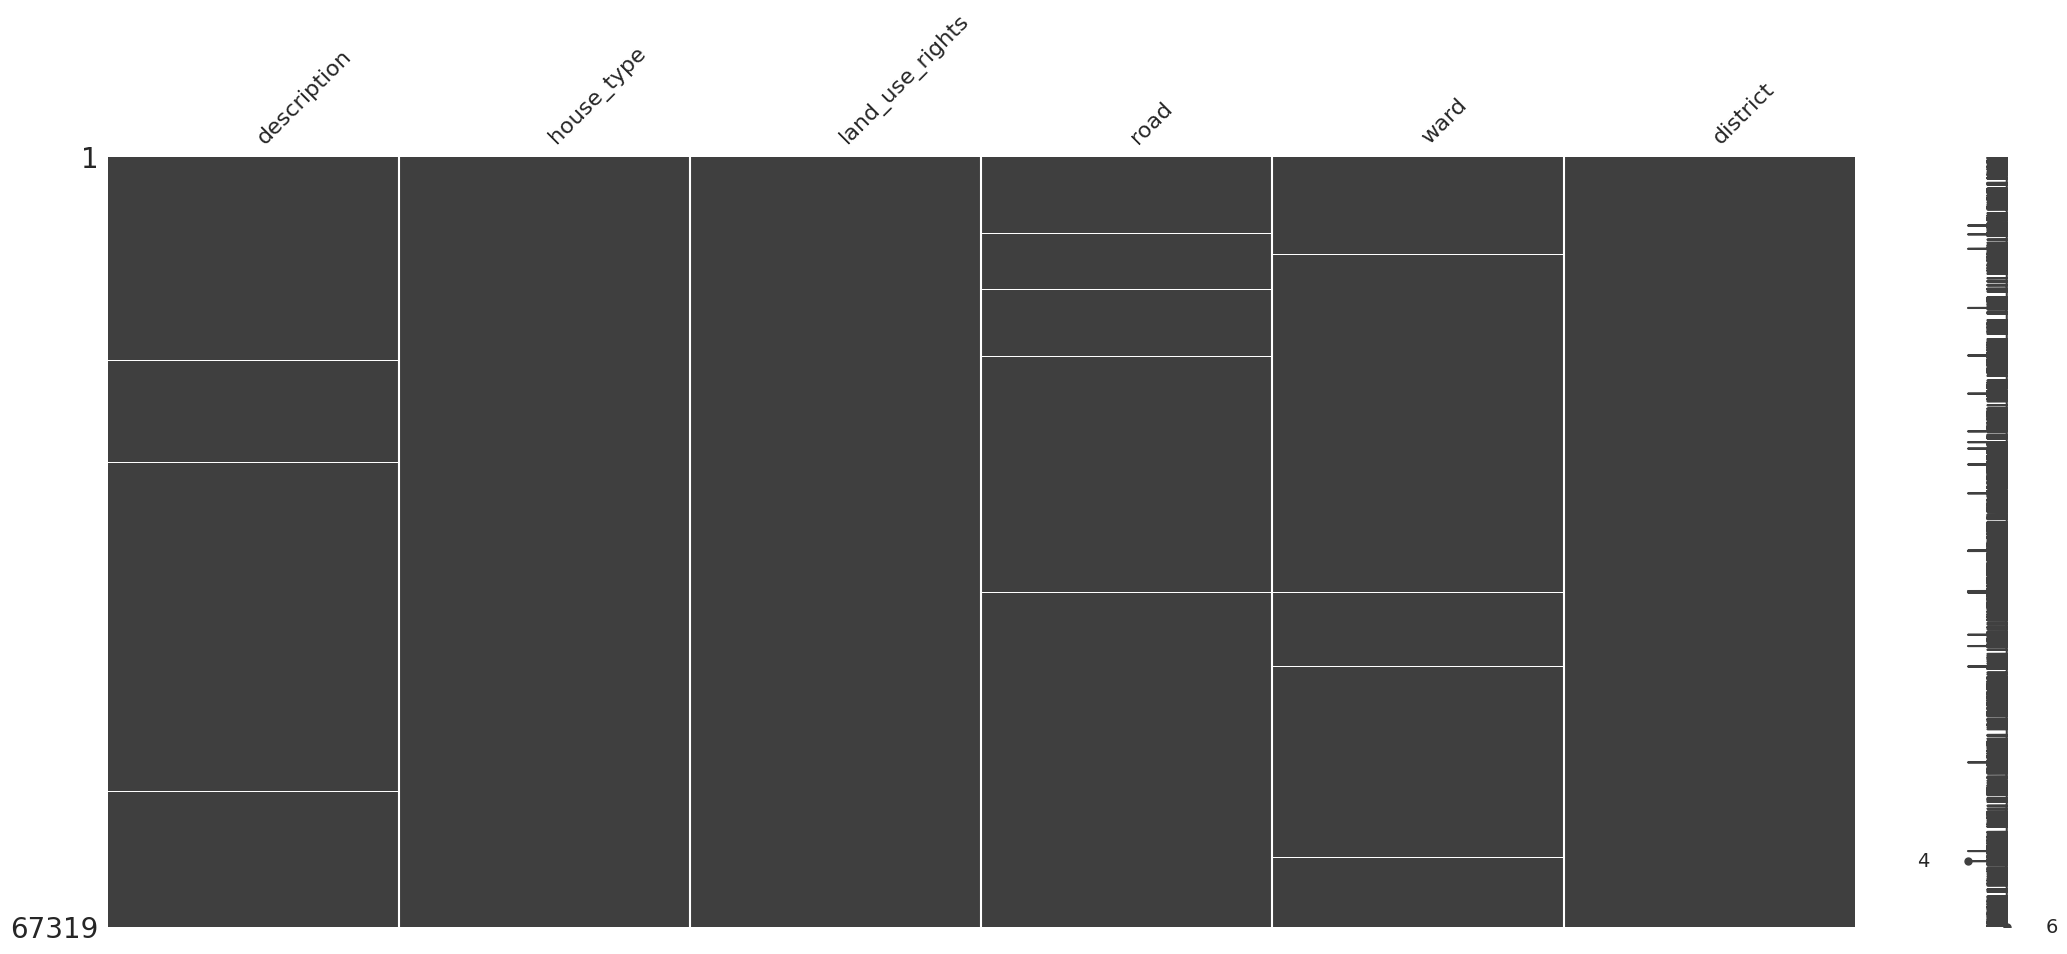

In [ ]:
import missingno as msno

cat_var = non_null_df_cleaned_3[non_null_df_cleaned_3.select_dtypes(include = 'object').columns]
%matplotlib inline
msno.matrix(cat_var)

In [ ]:
# remove description column
non_null_df_cleaned_4 = non_null_df_cleaned_3.drop(['description', 'road', 'ward'], axis=1)

In [ ]:
non_null_df_cleaned_4['distance_to_Ho_Tay'] = non_null_df_cleaned_4[['X', 'Y']].apply(lambda row: haversine(row['X'], row['Y'], ht_lat, ht_long), axis=1)
non_null_df_cleaned_4['distance_to_Ho_Guom'] = non_null_df_cleaned_4[['X', 'Y']].apply(lambda row: haversine(row['X'], row['Y'], hg_lat, hg_long), axis=1)

<Axes: >

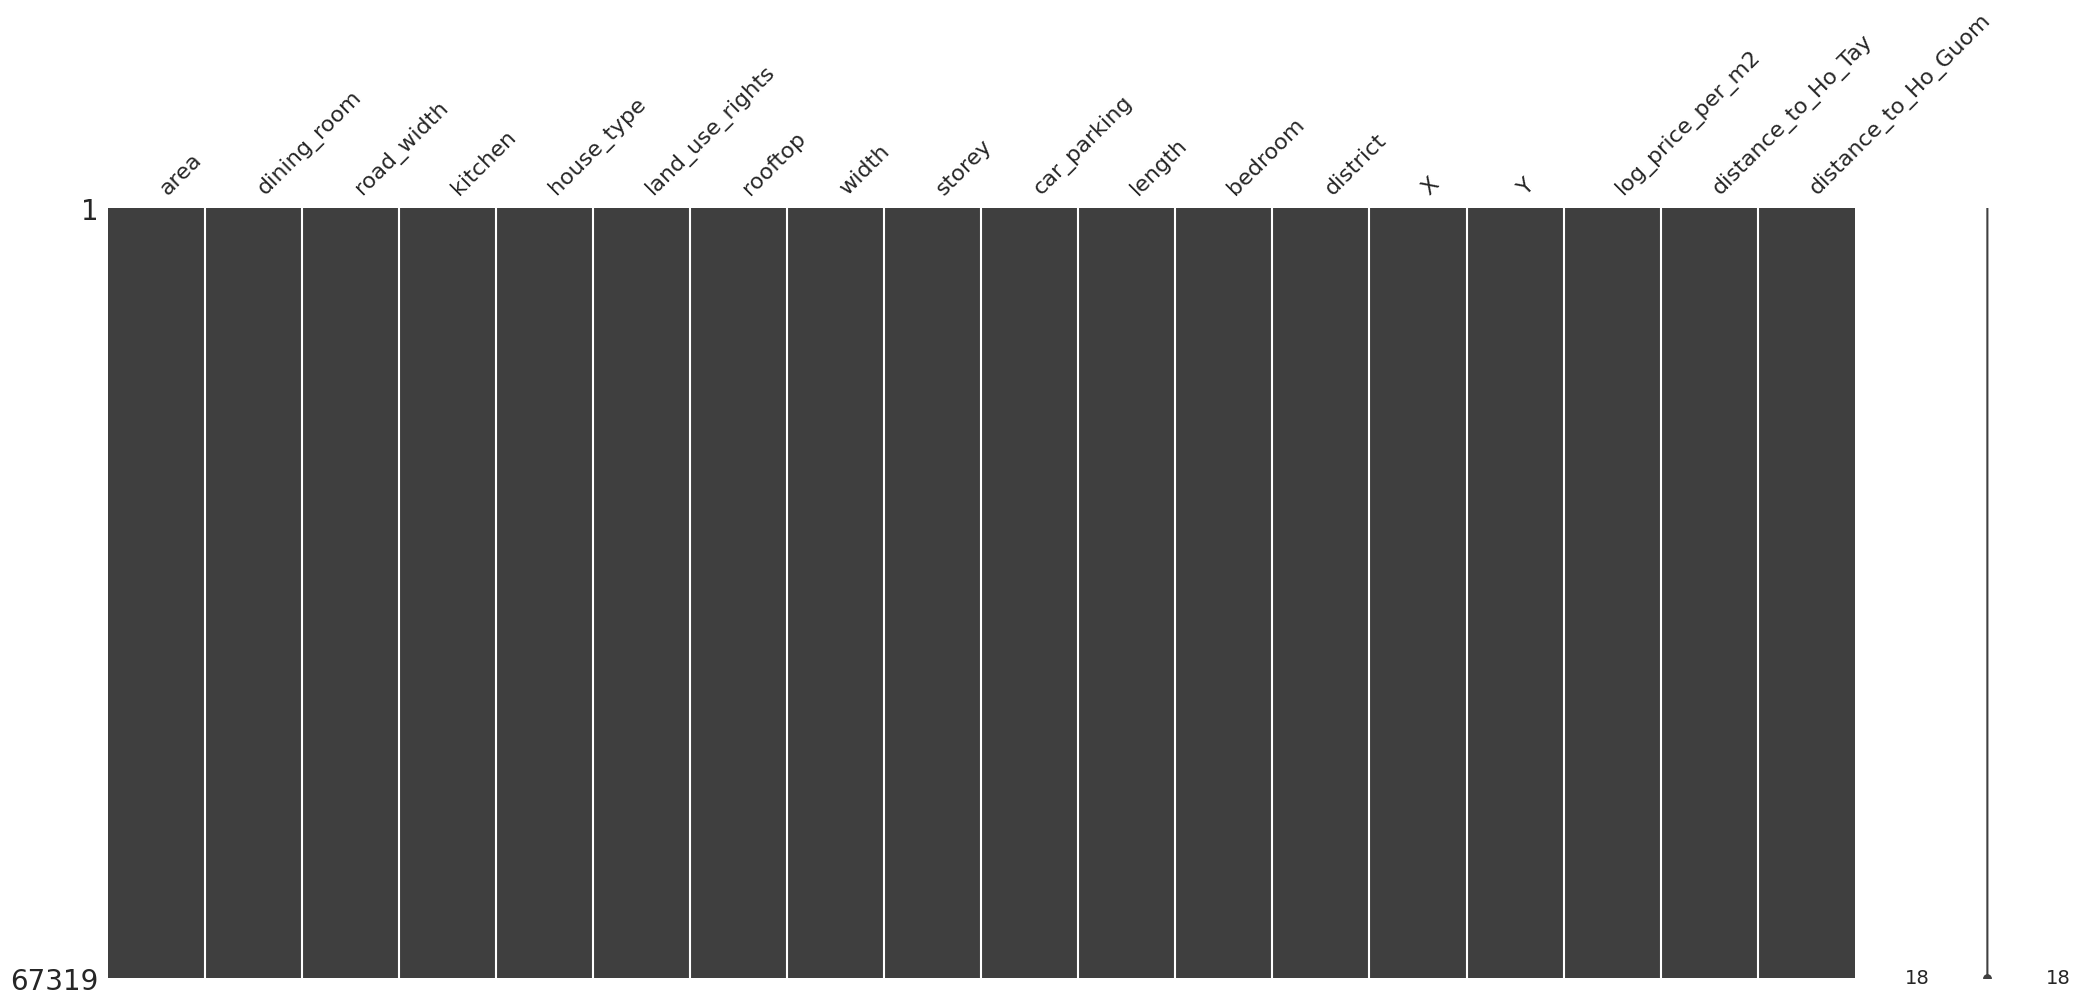

In [ ]:
import missingno as msno

%matplotlib inline
msno.matrix(non_null_df_cleaned_4)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [ ]:
#encode categorical features by one hot encoding
non_null_df_cleaned_5 = pd.get_dummies(non_null_df_cleaned_4, columns=non_null_df_cleaned_4.select_dtypes(include = 'object').columns)

In [ ]:
non_null_df_cleaned_5.columns

Index(['area', 'dining_room', 'road_width', 'kitchen', 'rooftop', 'width',
       'storey', 'car_parking', 'length', 'bedroom', 'X', 'Y',
       'log_price_per_m2', 'distance_to_Ho_Tay', 'distance_to_Ho_Guom',
       'house_type_Biệt thự, nhà liền kề', 'house_type_Mặt bằng',
       'house_type_Nhà hàng, khách sạn', 'house_type_Nhà mặt tiền',
       'house_type_Nhà trong hẻm', 'house_type_Shop, kiot, quán',
       'house_type_Văn phòng', 'house_type_Đất nền, liền kề, đất dự án',
       'house_type_Đất thổ cư, đất ở', 'land_use_rights_Giấy phép KD',
       'land_use_rights_Giấy phép XD', 'land_use_rights_Giấy tờ hợp lệ',
       'land_use_rights_Sổ hồng/ Sổ đỏ', 'land_use_rights_nan',
       'district_ba đình', 'district_bắc từ liêm', 'district_chương mỹ',
       'district_cầu giấy', 'district_gia lâm', 'district_hai bà trưng',
       'district_hoài đức', 'district_hoàn kiếm', 'district_hoàng mai',
       'district_hà đông', 'district_long biên', 'district_mê linh',
       'district_nam t

In [ ]:
not_features = ['log_price_per_m2', 'district_ba đình', 'district_bắc từ liêm', 'district_chương mỹ',
       'district_cầu giấy', 'district_gia lâm', 'district_hai bà trưng',
       'district_hoài đức', 'district_hoàn kiếm', 'district_hoàng mai',
       'district_hà đông', 'district_long biên', 'district_mê linh',
       'district_nam từ liêm', 'district_quốc oai', 'district_sóc sơn',
       'district_sơn tây', 'district_thanh oai', 'district_thanh trì',
       'district_thanh xuân', 'district_thường tín', 'district_thạch thất',
       'district_tây hồ', 'district_đan phượng', 'district_đông anh',
       'district_đống đa']

features = [col for col in non_null_df_cleaned_5.columns]

In [ ]:
X = non_null_df_cleaned_5.drop(columns=['log_price_per_m2'])
y = non_null_df_cleaned_5['log_price_per_m2']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h3>XGBRegressor</h3>

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(n_estimators = 600, max_depth=20, eta=0.01, gamma=1,subsample=1,
    objective="reg:squarederror", enable_categorical=True, random_state=0)

In [ ]:
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eta=0.01, eval_metric=None,
             feature_types=None, gamma=1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=20,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=600,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
def print_metrics(y_true, y_pred, log = False):
    print('R2:', r2_score(y_true, y_pred))
    #take reverse log of y_pred
    if log:
        y_pred = np.expm1(y_pred)
        y_true = np.expm1(y_true)
    print('RMSE:', np.sqrt(mse(y_true, y_pred)))
    print('MAPE:', mape(y_true, y_pred))


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape,r2_score, mean_squared_error as mse
pred = xgb.predict(X_test_scaled)
print_metrics(pred, y_test, log = True)

R2: 0.6761396397611062
RMSE: 81.79111136758829
MAPE: 0.21772966957230216


In [ ]:
#with open("xgb.pickle", "wb") as f:
    #pickle.dump(xgb, f)

In [ ]:
importance = xgb.feature_importances_
feature_importance = pd.DataFrame({'feature':X_train.columns, 'importance':importance}).sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
2,road_width,0.284984
6,storey,0.087747
13,distance_to_Ho_Guom,0.076519
17,house_type_Nhà mặt tiền,0.050772
18,house_type_Nhà trong hẻm,0.039303
12,distance_to_Ho_Tay,0.036934
38,district_long biên,0.028913
37,district_hà đông,0.018428
35,district_hoàn kiếm,0.018401
46,district_thanh xuân,0.018029


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=0)
rf.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=20, n_estimators=300, random_state=0)

In [ ]:
print_metrics(y_test, rf.predict(X_test_scaled), log = True)

R2: 0.7753113246017451
RMSE: 78.01839817942417
MAPE: 0.21075620614176355


In [ ]:
non_null_df_cleaned_4[:10].head()

,area,dining_room,road_width,kitchen,house_type,land_use_rights,rooftop,width,storey,car_parking,length,bedroom,district,X,Y,log_price_per_m2,distance_to_Ho_Tay,distance_to_Ho_Guom
19,54.0,True,6.0,True,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,True,4.8,6.0,True,11.250000,4.0,hai bà trưng,21.000510,105.845270,5.603485,11.794576,3.220535
20,90.0,True,7.0,True,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,True,5.0,4.0,True,18.000000,4.0,hoàng mai,20.983590,105.841149,5.292188,12.592856,5.147962
21,33.0,True,3.0,True,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,True,5.0,4.0,False,6.500000,3.0,hà đông,20.955185,105.758011,4.452584,11.499585,12.854176
22,70.0,True,3.0,True,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,True,9.0,4.0,True,10.000000,4.0,ba đình,21.043212,105.837886,5.436214,9.273961,2.344298
23,60.0,True,6.0,True,Nhà trong hẻm,Sổ hồng/ Sổ đỏ,True,4.5,6.0,True,13.333333,4.0,đống đa,21.014685,105.823543,5.179909,9.044963,3.496308


In [ ]:
rf.predict(non_null_df_cleaned_5.drop(columns=['log_price_per_m2'])[:10])

array([5.01577744, 5.00967349, 5.01029984, 4.99758761, 5.07639519,
       4.4321822 , 5.03102107, 5.06927293, 5.02203209, 5.01032791])

In [ ]:
non_null_df_cleaned_4["house_type"].unique()

array(['Nhà trong hẻm', 'Nhà mặt tiền', 'Biệt thự, nhà liền kề',
       'Đất thổ cư, đất ở', 'Văn phòng', 'Nhà hàng, khách sạn',
       'Shop, kiot, quán', 'Mặt bằng', 'Đất nền, liền kề, đất dự án'],
      dtype=object)

In [ ]:
non_null_df_cleaned_4.iloc[0]

area                             54.0
dining_room                      True
road_width                        6.0
kitchen                          True
house_type              Nhà trong hẻm
land_use_rights        Sổ hồng/ Sổ đỏ
rooftop                          True
width                             4.8
storey                            6.0
car_parking                      True
length                          11.25
bedroom                           4.0
district                 hai bà trưng
X                            21.00051
Y                           105.84527
log_price_per_m2             5.603485
distance_to_Ho_Tay          11.794576
distance_to_Ho_Guom          3.220535
Name: 19, dtype: object

In [ ]:
import numpy as np

data = {
    'area': 54.0,
    'dining_room': True,
    'road_width': 6.0,
    'kitchen': True,
    'house_type': 'Nhà trong hẻm',
    'land_use_rights': 'Sổ hồng/ Sổ đỏ',
    'rooftop': True,
    'width': 4.8,
    'storey': 5.0,
    'car_parking': True,
    'length': 11.25,
    'bedroom': 4.0,
    'district': 'hai bà trưng',
    'X': 21.00051,
    'Y': 105.84527,
    'log_price_per_m2': 5.603485,
    'distance_to_Ho_Tay': 11.794576,
    'distance_to_Ho_Guom': 3.220535
}

data_series = pd.Series(data)
numpy_array = data_series.to_numpy()
data_frame = pd.DataFrame(data, index=[0])


In [ ]:
with open("rf.pickle", "wb") as f:
    pickle.dump(rf, f)

In [ ]:
importance = rf.feature_importances_
feature_importance = pd.DataFrame({'feature':X_train.columns, 'importance':importance}).sort_values(by='importance', ascending=False)
feature_importance

,feature,importance
2,road_width,3.955159e-01
13,distance_to_Ho_Guom,1.640373e-01
6,storey,1.422497e-01
12,distance_to_Ho_Tay,6.044248e-02
0,area,4.178213e-02
10,X,4.020752e-02
8,length,3.144269e-02
11,Y,2.718888e-02
5,width,2.472180e-02
9,bedroom,1.776459e-02


<h3>Linear Models</h3>

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print_metrics(y_test, lr.predict(X_test_scaled), log=True) #Lower the better

R2: 0.6395427567596503
RMSE: 101.78206200637595
MAPE: 0.29319698057320925


In [ ]:
with open("lr.pickle", "wb") as f:
    pickle.dump(lr, f)

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
print("Result of Lasso")
print_metrics(y_test, lasso.predict(X_test_scaled), log=True) #Lower the better

Result of Lasso
R2: 0.6253395610337386
RMSE: 104.81594900577299
MAPE: 0.29815149627739257


In [ ]:
with open("lasso.pickle", "wb") as f:
    pickle.dump(lasso, f)

In [ ]:
lasso_cv = LassoCV(cv = 5)
lasso_cv.fit(X_train_scaled, y_train)
print("Result of LassoCV")
print_metrics(y_test, lasso_cv.predict(X_test_scaled), log=True) #Lower the better

Result of LassoCV
R2: 0.638754573597021
RMSE: 102.13903632319168
MAPE: 0.2936778568997348


In [ ]:
with open("lassoCV.pickle", "wb") as f:
    pickle.dump(lasso_cv, f)

In [ ]:
ridge = Ridge(alpha=0.01)
ridge.fit(X_train_scaled, y_train)
print("Result of Ridge")
print_metrics(y_test, ridge.predict(X_test_scaled), log=True)

Result of Ridge
R2: 0.6395402915472335
RMSE: 101.7859583467977
MAPE: 0.2932009925104808


In [ ]:
with open("ridge.pickle", "wb") as f:
    pickle.dump(ridge, f)

In [ ]:
ridge_CV = RidgeCV(cv = 5)
ridge_CV.fit(X_train_scaled, y_train)
print("Result of RidgeCV")
print_metrics(y_test, ridge_CV.predict(X_test_scaled), log=True)

Result of RidgeCV
R2: 0.6395398397094582
RMSE: 101.78668174951883
MAPE: 0.2932016528639391


In [ ]:
with open("ridgeCV.pickle", "wb") as f:
    pickle.dump(ridge_CV, f)

<h3>KNN and ANN</h3>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor as KNR
knn = KNR(n_neighbors=10, weights="distance", metric="minkowski")
knn.fit(X_train_scaled, y_train)
print("Result of KNN")
print_metrics(y_test, knn.predict(X_test_scaled), True)

Result of KNN
R2: 0.7033218059405568
RMSE: 89.00436728520164
MAPE: 0.24484155313563696


In [ ]:
with open("knn.pickle", "wb") as f:
    pickle.dump(knn, f)

Text(0.5, 1.0, 'MAPE vs the number of nearest neighbors K')

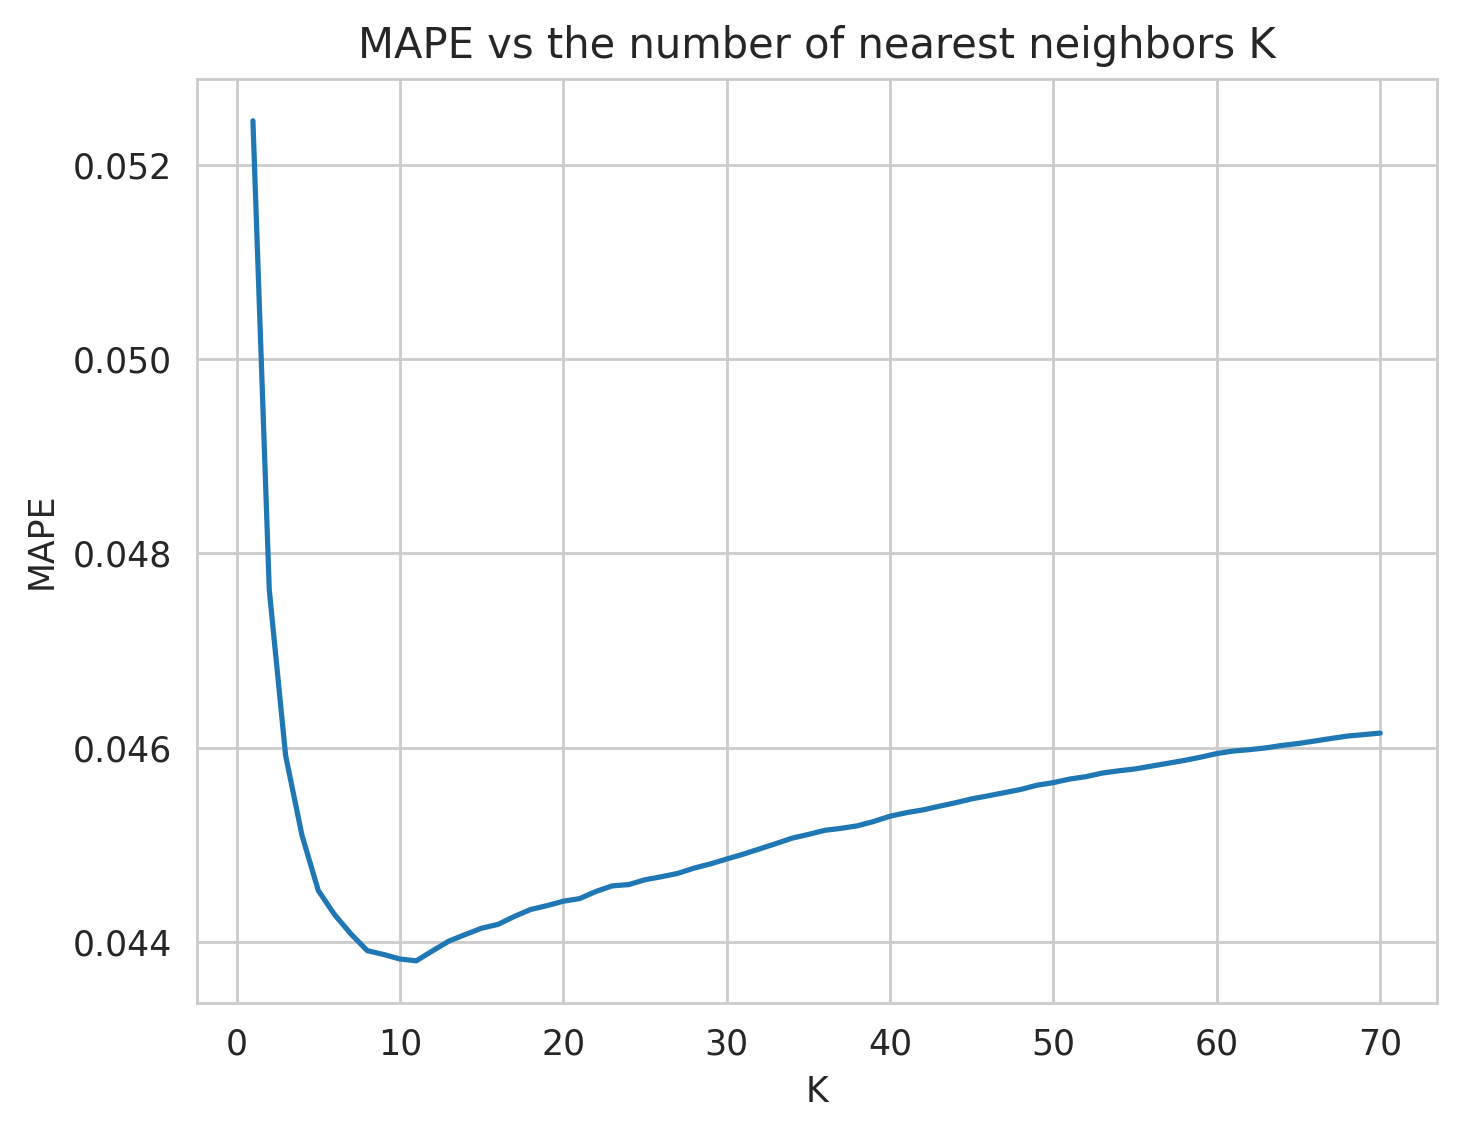

In [ ]:
results = []
for i in range(1,71):
    knn = KNR(n_neighbors=i, weights="distance", metric="minkowski")
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)
    results.append(mape(y_test, pred))
from matplotlib import pyplot as plt
plt.figure(dpi=250)
plt.plot(range(1,71), results)
plt.xlabel("K")
plt.ylabel("MAPE")
plt.title("MAPE vs the number of nearest neighbors K")

In [ ]:
X_train_scaled,X_dev_scaled, y_train, y_dev = train_test_split(X_train_scaled, y_train, test_size=0.1)

In [ ]:
from tensorflow import keras as ks
import tensorflow as tf
model = ks.Sequential()
model.add(ks.layers.Dense(30, input_dim = 53, activation = 'relu', name = 'input'))
model.add(ks.layers.Dropout(0.1))
model.add(ks.layers.Dense(1, name = 'output'))
opt = ks.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = opt,
              loss = tf.keras.losses.MeanSquaredLogarithmicError(),
              metrics = ['mean_absolute_percentage_error'])
train_history = model.fit(X_train_scaled, y_train, batch_size = 512, epochs = 30, validation_split = 0.1)
ann_train_res = model.evaluate(X_dev_scaled, y_dev)
ann_test_res = model.evaluate(X_test_scaled, y_test)
print("Train:  Loss = %f, Mean_absolute percentage_error = %f" %(ann_train_res[0], ann_train_res[1]/100))
print("Test:  Loss = %f, Mean_absolute_perntage_error = %f" %(ann_test_res[0], ann_test_res[1]/100))

Epoch 1/30
86/86 [==============================] - 1s 5ms/step - loss: 0.2351 - mean_absolute_percentage_error: 28.3800 - val_loss: 0.0127 - val_mean_absolute_percentage_error: 9.9921
Epoch 2/30
86/86 [==============================] - 0s 3ms/step - loss: 0.0226 - mean_absolute_percentage_error: 13.3032 - val_loss: 0.0072 - val_mean_absolute_percentage_error: 7.4922
Epoch 3/30
86/86 [==============================] - 0s 3ms/step - loss: 0.0170 - mean_absolute_percentage_error: 11.5555 - val_loss: 0.0055 - val_mean_absolute_percentage_error: 6.6545
Epoch 4/30
86/86 [==============================] - 0s 3ms/step - loss: 0.0150 - mean_absolute_percentage_error: 10.8056 - val_loss: 0.0047 - val_mean_absolute_percentage_error: 6.1264
Epoch 5/30
86/86 [==============================] - 0s 3ms/step - loss: 0.0129 - mean_absolute_percentage_error: 10.2696 - val_loss: 0.0043 - val_mean_absolute_percentage_error: 5.8446
Epoch 6/30
86/86 [==============================] - 0s 3ms/step - loss: 0.0

In [ ]:
pred = model.predict(X_test_scaled)
print_metrics(y_test, pred, log=True)

421/421 [==============================] - 1s 1ms/step
R2: 0.6405791741223335
RMSE: 107.39377415238704
MAPE: 0.2932865402498051


In [ ]:
with open("ann.pickle", "wb") as f:
    pickle.dump(model, f)